In [ ]:
!pip install ydata-synthetic

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 47 kB 3.6 MB/s 
     |████████████████████████████████| 11.6 MB 53.6 MB/s 
     |████████████████████████████████| 9.9 MB 59.4 MB/s 
     |████████████████████████████████| 394.5 MB 36 kB/s 
     |████████████████████████████████| 280 kB 58.5 MB/s 
     |████████████████████████████████| 14.8 MB 57.8 MB/s 
     |████████████████████████████████| 62 kB 1.6 MB/s 
     |████████████████████████████████| 596 kB 70.4 MB/s 
     |████████████████████████████████| 132 kB 64.1 MB/s 
     |████████████████████████████████| 2.9 MB 16.2 MB/s 
     |████████████████████████████████| 3.8 MB 29.9 MB/s 
     |████████████████████████████████| 462 kB 18.1 MB/s 
  Created wheel for wrapt: filename=wrapt-1.12.1-cp37-cp37m-linux_x86_64.whl size=68719 sha256=a1bf9258997f1229174f8a72654fa81ea7d595410de8a464316623301382ad34
  Stored in directory: /root/.cache/pip/wheels/

In [ ]:
def load_dataset(benchmark, algo):
  real_data_orig=pd.read_csv(drive_location+algo+".csv")
  #print(real_data_orig)
  #real_data_selected_col = real_data_orig.drop(columns=['sys','sysname','arch','PS','executable'])
  if (benchmark == "SPEC2006" or benchmark == "SPEC2017"):
    real_data_selected_col=real_data_orig.drop(columns=['arch','ld_shared_by_cores','l2_shared_by_cores','no_of_threads','system_name','bus_speed_qpi','bus_speed_dmi','l1_ins_assoc','l1_data_assoc','l2_assoc','l3_assoc','raw_bus_speed','converted_bus_speed','ddr_type','runtime'])
  elif (benchmark == "NPB"):
    real_data_selected_col=real_data_orig.drop(columns=['sys','sysname','arch','l1d_assoc','l1d_cache_lines','l1d_shared_by_threads','l2_assoc','l2_cache_lines','l2_shared_by_threads','l3_assoc','l3_cache_lines','l3_shared_by_threads','PS','runtime','executable','system'])
  else:
    real_data_selected_col=real_data_orig.drop(columns=['sys','arch','l1d_assoc','l1d_cache_lines','l1d_shared_by_threads','l2_assoc','l2_cache_lines','l2_shared_by_threads','l3_assoc','l3_cache_lines','l3_shared_by_threads','runtime'])
  #print(real_data_selected_col)
  real_data_selected_col.dropna(inplace=True)
  #print(real_data_selected_col)
  return real_data_selected_col

In [ ]:
import pandas as pd
drive_location = r"/content/drive/My Drive/SITesting/"

# Mantevo Suite
#benchmark = "Mantevo"
#algo="mantevo_miniFE"
#algo_fname="runtimes_final_mantevo_miniFE"
# NPB Suite
#benchmark = "NPB"
#algo = "npb_ep"
#algo_fname="runtimes_final_npb_ep"
#benchmark = "NPB"
#algo = "npb_mg"
#algo_fname="runtimes_final_npb_mg"
# SPEC 2006 Float
#benchmark = "SPEC2006"
#algo = "leslie3d"
#algo_fname = "437.leslie3d"
# SPEC 2006 Int
#benchmark = "SPEC2006"
#algo = "perlbench"
#algo_fname = "400.perlbench"
benchmark = "SPEC2017"
algo = "603.bwaves_s"
algo_fname = "603.bwaves_s"

spec_float_benchmark_list = ["SPEC2017","SPEC2017","SPEC2017","SPEC2017","SPEC2017","SPEC2017","SPEC2017","SPEC2017","SPEC2017","SPEC2017","SPEC2006","SPEC2006","SPEC2006","SPEC2006","SPEC2006","SPEC2006","SPEC2006","SPEC2006","SPEC2006"]
spec_float_algo_list = ["603.bwaves_s","607.cactuBSSN_s","619.lbm_s","621.wrf_s","627.cam4_s","628.pop2_s","638.imagick_s","644.nab_s","649.fotonik3d_s","654.roms_s","416.gamess","433.milc","434.zeusmp","435.gromacs","437.leslie3d","447.dealII","450.soplex","453.povray","454.calculix"]
spec_float_algo_fname_list = ["603.bwaves_s","607.cactuBSSN_s","619.lbm_s","621.wrf_s","627.cam4_s","628.pop2_s","638.imagick_s","644.nab_s","649.fotonik3d_s","654.roms_s","416.gamess","433.milc","434.zeusmp","435.gromacs","437.leslie3d","447.dealII","450.soplex","453.povray","454.calculix"]

spec_int_benchmark_list = ["SPEC2017","SPEC2017","SPEC2017","SPEC2017","SPEC2017","SPEC2017","SPEC2017","SPEC2017","SPEC2017","SPEC2017","SPEC2006","SPEC2006","SPEC2006","SPEC2006","SPEC2006"]
spec_int_algo_list = ["600.perlbench_s","602.gcc_s","605.mcf_s","620.omnetpp_s","623.xalancbmk_s","625.x264_s","631.deepsjeng_s","641.leela_s","648.exchange2_s","657.xz_s","401.bzip2","456.hmmer","458.sjeng","462.libquantum","473.astar"]
spec_int_algo_fname_list = ["600.perlbench_s","602.gcc_s","605.mcf_s","620.omnetpp_s","623.xalancbmk_s","625.x264_s","631.deepsjeng_s","641.leela_s","648.exchange2_s","657.xz_s","401.bzip2","456.hmmer","458.sjeng","462.libquantum","473.astar"]

npb_other_benchmark_list = ["NPB","NPB","NPB","NPB","OTHER","OTHER","OTHER"]
npb_other_algo_list = ["npb_ep","npb_mg","npb_sp","npb_sp-mz","matmul","montecarlo","quicksort"]
npb_other_algo_fname_list = ["npb_ep","npb_mg","npb_sp","npb_sp-mz","matmul","montecarlo","quicksort"]


# Assign variable with which list is to be processed
benchmark_list = npb_other_benchmark_list
algo_list = npb_other_algo_list
algo_fname_list = npb_other_algo_fname_list
#for algo_idx, algo in enumerate(algo_list):

pd.set_option("display.max_columns", None)
# Load and preprocess real dataset
real_data = load_dataset(benchmark, algo)
# real_data.to_csv(drive_location+algo+"_real_data_tf.csv",index=False)

NameError: ignored

In [ ]:
import numpy as np

from ydata_synthetic.synthesizers import ModelParameters, TrainParameters
from ydata_synthetic.synthesizers.regular import WGAN_GP

In [ ]:
model=WGAN_GP

# GAN training
#Define the GAN and training parameters
noise_dim = 256
dim = 256
batch_size = 200

log_step = 120
epochs = 1000+1
learning_rate = [5e-4,3e-3]
beta_1 = 0.5
beta_2 = 0.9
models_dir = './cache'

gan_args = ModelParameters(batch_size=batch_size,
                           lr=learning_rate,
                           betas=(beta_1, beta_2),
                           noise_dim=noise_dim,
                           layers_dim=dim)

train_args = TrainParameters(epochs=epochs,
                             sample_interval=log_step)

test_size = 492 
noise_dim = 32


In [ ]:
#Training the WGAN_GP model
num_cols=[]
num_cols.append('cpu_clock')
cat_cols=list(real_data)
cat_cols=cat_cols[1::]
synthesizer = model(gan_args, n_critic=2)
synthesizer.train(real_data, train_args, num_cols=num_cols, cat_cols=cat_cols)

  0%|          | 3/1001 [00:04<20:13,  1.22s/it]  

Epoch: 0 | disc_loss: 0.1257603019475937 | gen_loss: -0.04655678570270538
Epoch: 1 | disc_loss: -0.02747361734509468 | gen_loss: -0.04243210330605507
Epoch: 2 | disc_loss: -0.009093496948480606 | gen_loss: -0.05868368223309517


  1%|          | 7/1001 [00:04<06:25,  2.58it/s]

Epoch: 3 | disc_loss: 0.6870322227478027 | gen_loss: -0.03803570196032524
Epoch: 4 | disc_loss: 7.179873943328857 | gen_loss: 0.007702821400016546
Epoch: 5 | disc_loss: 0.6013595461845398 | gen_loss: 0.09365837275981903
Epoch: 6 | disc_loss: 1.7294583320617676 | gen_loss: -0.028350401669740677


  1%|          | 9/1001 [00:05<04:23,  3.76it/s]

Epoch: 7 | disc_loss: 0.1486150473356247 | gen_loss: 0.009656731970608234
Epoch: 8 | disc_loss: 0.40299513936042786 | gen_loss: -0.0034850602969527245


  1%|▏         | 13/1001 [00:05<02:38,  6.24it/s]

Epoch: 9 | disc_loss: 0.3143788278102875 | gen_loss: 0.0037352945655584335
Epoch: 10 | disc_loss: 0.9241718649864197 | gen_loss: 0.03517422080039978
Epoch: 11 | disc_loss: 0.09484037756919861 | gen_loss: -0.02248503267765045
Epoch: 12 | disc_loss: 0.17337478697299957 | gen_loss: -0.01122584193944931


  2%|▏         | 17/1001 [00:05<01:47,  9.15it/s]

Epoch: 13 | disc_loss: 0.0773872584104538 | gen_loss: 0.008671565912663937
Epoch: 14 | disc_loss: 1.6750926971435547 | gen_loss: -0.009464596398174763
Epoch: 15 | disc_loss: 5.236297130584717 | gen_loss: 0.0039029549807310104
Epoch: 16 | disc_loss: 0.009888075292110443 | gen_loss: 0.024203777313232422


  2%|▏         | 21/1001 [00:05<01:23, 11.80it/s]

Epoch: 17 | disc_loss: 0.8495221138000488 | gen_loss: -0.00040531050763092935
Epoch: 18 | disc_loss: 2.0951313972473145 | gen_loss: 0.01683785393834114
Epoch: 19 | disc_loss: 0.4620888829231262 | gen_loss: 0.01083489041775465
Epoch: 20 | disc_loss: -0.04201052710413933 | gen_loss: 0.05684281513094902


  2%|▏         | 25/1001 [00:06<01:12, 13.48it/s]

Epoch: 21 | disc_loss: 0.24467745423316956 | gen_loss: 0.007958730682730675
Epoch: 22 | disc_loss: 0.039022717624902725 | gen_loss: -0.0025696957018226385
Epoch: 23 | disc_loss: 1.3796545267105103 | gen_loss: -0.08973558247089386
Epoch: 24 | disc_loss: 0.1937079131603241 | gen_loss: 0.07014107704162598


  3%|▎         | 29/1001 [00:06<01:06, 14.62it/s]

Epoch: 25 | disc_loss: 0.1762010157108307 | gen_loss: -0.009001510217785835
Epoch: 26 | disc_loss: 0.2358597368001938 | gen_loss: 0.000974993861746043
Epoch: 27 | disc_loss: 8.98165512084961 | gen_loss: -0.002725555095821619
Epoch: 28 | disc_loss: 0.015489187091588974 | gen_loss: 0.027067355811595917


  3%|▎         | 31/1001 [00:06<01:05, 14.90it/s]

Epoch: 29 | disc_loss: -0.03751164302229881 | gen_loss: 0.019992373883724213
Epoch: 30 | disc_loss: 0.014268701896071434 | gen_loss: -0.12206798791885376


  3%|▎         | 35/1001 [00:08<03:46,  4.27it/s]

Epoch: 31 | disc_loss: 2.1937544345855713 | gen_loss: -0.15757210552692413
Epoch: 32 | disc_loss: 0.01994483172893524 | gen_loss: 0.005566528998315334
Epoch: 33 | disc_loss: -0.01943601481616497 | gen_loss: 0.0038072329480201006
Epoch: 34 | disc_loss: 1.9313831329345703 | gen_loss: -0.002217692555859685


  4%|▍         | 38/1001 [00:08<02:51,  5.62it/s]

Epoch: 35 | disc_loss: 0.7764517068862915 | gen_loss: -0.029323400929570198
Epoch: 36 | disc_loss: -0.026791708543896675 | gen_loss: -0.009953212924301624
Epoch: 37 | disc_loss: -0.014017336070537567 | gen_loss: -0.0020009810104966164


  4%|▍         | 42/1001 [00:08<01:52,  8.50it/s]

Epoch: 38 | disc_loss: 0.1947813183069229 | gen_loss: 0.00800851359963417
Epoch: 39 | disc_loss: 0.9638229012489319 | gen_loss: 0.01163654588162899
Epoch: 40 | disc_loss: -0.041063092648983 | gen_loss: 0.01890779472887516
Epoch: 41 | disc_loss: 2.1935715675354004 | gen_loss: 0.018241846933960915


  5%|▍         | 46/1001 [00:08<01:27, 10.96it/s]

Epoch: 42 | disc_loss: 0.8236503005027771 | gen_loss: -0.017920196056365967
Epoch: 43 | disc_loss: 0.1123795434832573 | gen_loss: 0.02609226666390896
Epoch: 44 | disc_loss: 0.14209382236003876 | gen_loss: 0.03706232085824013
Epoch: 45 | disc_loss: 14.84119987487793 | gen_loss: -0.10575331747531891


  5%|▍         | 50/1001 [00:09<01:28, 10.75it/s]

Epoch: 46 | disc_loss: -0.015063092112541199 | gen_loss: -0.02021186612546444
Epoch: 47 | disc_loss: 0.10810330510139465 | gen_loss: -0.010517214424908161
Epoch: 48 | disc_loss: 0.8508626222610474 | gen_loss: -0.005367108155041933
Epoch: 49 | disc_loss: 0.9302138686180115 | gen_loss: 0.012072520330548286


  5%|▌         | 54/1001 [00:10<02:24,  6.58it/s]

Epoch: 50 | disc_loss: 0.038084015250205994 | gen_loss: -0.03394002094864845
Epoch: 51 | disc_loss: 3.3977811336517334 | gen_loss: -0.0017057834193110466
Epoch: 52 | disc_loss: 0.24959102272987366 | gen_loss: -0.0031453147530555725
Epoch: 53 | disc_loss: 5.809665203094482 | gen_loss: -0.010771377943456173
Epoch: 54 | disc_loss: -0.013719344511628151 | gen_loss: -0.024131689220666885


  6%|▌         | 58/1001 [00:10<01:40,  9.36it/s]

Epoch: 55 | disc_loss: 0.6961833238601685 | gen_loss: -0.0037644142284989357
Epoch: 56 | disc_loss: 2.425527811050415 | gen_loss: -0.030258527025580406
Epoch: 57 | disc_loss: 14.805526733398438 | gen_loss: 0.07211089879274368


  6%|▌         | 62/1001 [00:11<02:10,  7.20it/s]

Epoch: 58 | disc_loss: -0.01688445545732975 | gen_loss: 0.06979585438966751
Epoch: 59 | disc_loss: 0.0130974892526865 | gen_loss: 0.051725950092077255
Epoch: 60 | disc_loss: 7.2789459228515625 | gen_loss: 0.002044572262093425
Epoch: 61 | disc_loss: 0.04108530655503273 | gen_loss: -0.005832953378558159


  7%|▋         | 66/1001 [00:11<01:34,  9.88it/s]

Epoch: 62 | disc_loss: 0.07895329594612122 | gen_loss: 0.024179721251130104
Epoch: 63 | disc_loss: 0.8104730844497681 | gen_loss: -0.007638756185770035
Epoch: 64 | disc_loss: 0.23132659494876862 | gen_loss: 0.0057791112922132015
Epoch: 65 | disc_loss: 0.41816219687461853 | gen_loss: 0.007908748462796211


  7%|▋         | 70/1001 [00:11<01:16, 12.10it/s]

Epoch: 66 | disc_loss: 0.3578581213951111 | gen_loss: 0.04116678237915039
Epoch: 67 | disc_loss: 0.009896636009216309 | gen_loss: -0.050181690603494644
Epoch: 68 | disc_loss: 0.15368816256523132 | gen_loss: -0.029213709756731987
Epoch: 69 | disc_loss: 2.8451008796691895 | gen_loss: -0.026554720476269722


  7%|▋         | 74/1001 [00:11<01:08, 13.57it/s]

Epoch: 70 | disc_loss: 0.7926783561706543 | gen_loss: -0.016430731862783432
Epoch: 71 | disc_loss: -0.009465007111430168 | gen_loss: 0.05267680063843727
Epoch: 72 | disc_loss: 0.12691093981266022 | gen_loss: 0.06298582255840302
Epoch: 73 | disc_loss: 15.442736625671387 | gen_loss: 0.02209518663585186


  8%|▊         | 78/1001 [00:12<01:07, 13.63it/s]

Epoch: 74 | disc_loss: -0.026079269126057625 | gen_loss: 0.02806987054646015
Epoch: 75 | disc_loss: 0.4620070457458496 | gen_loss: 0.04841449111700058
Epoch: 76 | disc_loss: 0.26254647970199585 | gen_loss: 0.042836688458919525
Epoch: 77 | disc_loss: 6.448445796966553 | gen_loss: 0.03316976875066757


  8%|▊         | 82/1001 [00:12<01:03, 14.54it/s]

Epoch: 78 | disc_loss: 0.2746201455593109 | gen_loss: 0.05335361883044243
Epoch: 79 | disc_loss: -0.033154718577861786 | gen_loss: 0.10479988157749176
Epoch: 80 | disc_loss: 2.0615053176879883 | gen_loss: -0.007681063376367092
Epoch: 81 | disc_loss: 1.245833158493042 | gen_loss: -0.025141596794128418


  9%|▊         | 86/1001 [00:12<01:01, 14.76it/s]

Epoch: 82 | disc_loss: 4.928493499755859 | gen_loss: -0.013087489642202854
Epoch: 83 | disc_loss: -0.0037309802137315273 | gen_loss: 0.011094884015619755
Epoch: 84 | disc_loss: 1.7366456985473633 | gen_loss: -0.016181645914912224
Epoch: 85 | disc_loss: 0.07317179441452026 | gen_loss: -0.019086480140686035


  9%|▉         | 90/1001 [00:13<01:00, 15.14it/s]

Epoch: 86 | disc_loss: 0.13810847699642181 | gen_loss: 0.05195636674761772
Epoch: 87 | disc_loss: 1.9629147052764893 | gen_loss: 0.06444240361452103
Epoch: 88 | disc_loss: 0.10323913395404816 | gen_loss: -0.009324879385530949
Epoch: 89 | disc_loss: 0.7476509213447571 | gen_loss: -0.00040795159293338656


  9%|▉         | 92/1001 [00:13<01:00, 15.09it/s]

Epoch: 90 | disc_loss: 0.26818472146987915 | gen_loss: 0.06506255269050598
Epoch: 91 | disc_loss: 0.0025121630169451237 | gen_loss: -0.011701563373208046


 10%|▉         | 96/1001 [00:13<01:09, 12.93it/s]

Epoch: 92 | disc_loss: 12.931358337402344 | gen_loss: 0.0031438753940165043
Epoch: 93 | disc_loss: 0.005861934274435043 | gen_loss: 0.027725042775273323
Epoch: 94 | disc_loss: 1.1793429851531982 | gen_loss: 0.009940593503415585
Epoch: 95 | disc_loss: 2.6610021591186523 | gen_loss: 0.026363156735897064


 10%|▉         | 100/1001 [00:13<01:04, 14.05it/s]

Epoch: 96 | disc_loss: -0.011106021702289581 | gen_loss: 0.03425203636288643
Epoch: 97 | disc_loss: 0.19462904334068298 | gen_loss: 0.025909123942255974
Epoch: 98 | disc_loss: 17.42189598083496 | gen_loss: 0.015967654064297676
Epoch: 99 | disc_loss: 0.29627710580825806 | gen_loss: 0.01565122790634632


 10%|█         | 104/1001 [00:14<01:01, 14.70it/s]

Epoch: 100 | disc_loss: 0.2504405975341797 | gen_loss: 0.016965359449386597
Epoch: 101 | disc_loss: 1.6782300472259521 | gen_loss: 6.0743836911569815e-06
Epoch: 102 | disc_loss: -0.015888819471001625 | gen_loss: 0.0046206372790038586
Epoch: 103 | disc_loss: 4.401931285858154 | gen_loss: 0.02652227133512497


 11%|█         | 108/1001 [00:14<01:09, 12.76it/s]

Epoch: 104 | disc_loss: 0.07733681797981262 | gen_loss: 0.03619055822491646
Epoch: 105 | disc_loss: 0.099302738904953 | gen_loss: 0.043979816138744354
Epoch: 106 | disc_loss: 1.8948874473571777 | gen_loss: 0.052857909351587296
Epoch: 107 | disc_loss: 2.8192923069000244 | gen_loss: 0.06686506420373917


 11%|█         | 112/1001 [00:15<01:52,  7.89it/s]

Epoch: 108 | disc_loss: 0.07823032140731812 | gen_loss: 0.020068442448973656
Epoch: 109 | disc_loss: 1.1475838422775269 | gen_loss: 0.03360091522336006
Epoch: 110 | disc_loss: -0.027637816965579987 | gen_loss: 0.05514943227171898
Epoch: 111 | disc_loss: 3.776498556137085 | gen_loss: 0.039691220968961716


 12%|█▏        | 116/1001 [00:15<01:24, 10.51it/s]

Epoch: 112 | disc_loss: -0.01815098151564598 | gen_loss: 0.013067509979009628
Epoch: 113 | disc_loss: 0.10358675569295883 | gen_loss: 0.03759830817580223
Epoch: 114 | disc_loss: 1.0203135013580322 | gen_loss: 0.013363128527998924
Epoch: 115 | disc_loss: 0.3156871497631073 | gen_loss: 0.03596077859401703


 12%|█▏        | 120/1001 [00:16<01:58,  7.45it/s]

Epoch: 116 | disc_loss: 0.3336535096168518 | gen_loss: 0.0048941862769424915
Epoch: 117 | disc_loss: 4.213669776916504 | gen_loss: 0.011863771826028824
Epoch: 118 | disc_loss: 0.006776042282581329 | gen_loss: -0.0394783541560173
Epoch: 119 | disc_loss: 0.05489698052406311 | gen_loss: -0.004061541985720396


 12%|█▏        | 122/1001 [00:16<01:42,  8.54it/s]

Epoch: 120 | disc_loss: 0.10600685328245163 | gen_loss: -0.034305695444345474
Epoch: 121 | disc_loss: 0.00443984754383564 | gen_loss: 0.04171758517622948
Epoch: 122 | disc_loss: 3.500690460205078 | gen_loss: 0.03962411358952522


 13%|█▎        | 126/1001 [00:16<01:18, 11.18it/s]

Epoch: 123 | disc_loss: -0.011757062748074532 | gen_loss: -0.005699108354747295
Epoch: 124 | disc_loss: -0.031728338450193405 | gen_loss: 0.02811775915324688
Epoch: 125 | disc_loss: 0.20808467268943787 | gen_loss: 0.021619712933897972
Epoch: 126 | disc_loss: 10.477679252624512 | gen_loss: 0.03501371294260025


 13%|█▎        | 130/1001 [00:16<01:07, 12.96it/s]

Epoch: 127 | disc_loss: -0.015840381383895874 | gen_loss: 0.04991324990987778
Epoch: 128 | disc_loss: 0.8312469124794006 | gen_loss: 0.06566128134727478
Epoch: 129 | disc_loss: 0.3008071184158325 | gen_loss: 0.08945754915475845
Epoch: 130 | disc_loss: 1.5255327224731445 | gen_loss: 0.17028574645519257


 13%|█▎        | 134/1001 [00:17<01:31,  9.44it/s]

Epoch: 131 | disc_loss: -0.006200113333761692 | gen_loss: 0.05555374175310135
Epoch: 132 | disc_loss: 4.842343807220459 | gen_loss: 0.01897827349603176
Epoch: 133 | disc_loss: 0.019636251032352448 | gen_loss: 0.07351378351449966
Epoch: 134 | disc_loss: 0.09159939736127853 | gen_loss: 0.01704857125878334


 14%|█▍        | 138/1001 [00:17<01:12, 11.87it/s]

Epoch: 135 | disc_loss: 4.200506687164307 | gen_loss: -0.0004319899599067867
Epoch: 136 | disc_loss: 0.008455388247966766 | gen_loss: 0.014435302466154099
Epoch: 137 | disc_loss: 1.4038063287734985 | gen_loss: 0.03947943076491356
Epoch: 138 | disc_loss: 0.17690369486808777 | gen_loss: 0.018718048930168152


 14%|█▍        | 142/1001 [00:17<01:05, 13.12it/s]

Epoch: 139 | disc_loss: 0.025355637073516846 | gen_loss: 0.04496351629495621
Epoch: 140 | disc_loss: 0.0021642185747623444 | gen_loss: 0.05191005766391754
Epoch: 141 | disc_loss: 0.06715811789035797 | gen_loss: 0.024931658059358597
Epoch: 142 | disc_loss: 1.606913685798645 | gen_loss: 0.02492503821849823


 15%|█▍        | 146/1001 [00:18<01:01, 13.93it/s]

Epoch: 143 | disc_loss: 0.4816165566444397 | gen_loss: 0.08539223670959473
Epoch: 144 | disc_loss: 0.5394062399864197 | gen_loss: 0.08139780163764954
Epoch: 145 | disc_loss: 3.2634551525115967 | gen_loss: 0.03972167149186134


 15%|█▍        | 150/1001 [00:18<01:11, 11.85it/s]

Epoch: 146 | disc_loss: 0.12249097228050232 | gen_loss: 0.02322455495595932
Epoch: 147 | disc_loss: 1.680146336555481 | gen_loss: 0.028236618265509605
Epoch: 148 | disc_loss: 0.07475979626178741 | gen_loss: 0.06132499873638153
Epoch: 149 | disc_loss: 0.38039323687553406 | gen_loss: 0.03489511087536812


 15%|█▌        | 154/1001 [00:18<01:03, 13.37it/s]

Epoch: 150 | disc_loss: 0.7173010110855103 | gen_loss: 0.000499765039421618
Epoch: 151 | disc_loss: 0.33897149562835693 | gen_loss: 0.05047917366027832
Epoch: 152 | disc_loss: -0.043184421956539154 | gen_loss: 0.043888166546821594
Epoch: 153 | disc_loss: 0.32467368245124817 | gen_loss: 0.10461553931236267


 16%|█▌        | 156/1001 [00:18<01:00, 14.02it/s]

Epoch: 154 | disc_loss: 0.394232839345932 | gen_loss: 0.015878088772296906
Epoch: 155 | disc_loss: 0.5704748034477234 | gen_loss: 0.02687385492026806
Epoch: 156 | disc_loss: 7.96184778213501 | gen_loss: 0.02441052347421646


 16%|█▌        | 162/1001 [00:19<01:01, 13.56it/s]

Epoch: 157 | disc_loss: 0.038946669548749924 | gen_loss: 0.012408451177179813
Epoch: 158 | disc_loss: -0.034271761775016785 | gen_loss: 0.0006798355025239289
Epoch: 159 | disc_loss: -0.029089873656630516 | gen_loss: -0.02801556885242462
Epoch: 160 | disc_loss: 0.3072003126144409 | gen_loss: 0.0033820858225226402
Epoch: 161 | disc_loss: 0.15167878568172455 | gen_loss: -0.009723683819174767


 17%|█▋        | 166/1001 [00:19<00:57, 14.60it/s]

Epoch: 162 | disc_loss: 0.4835105538368225 | gen_loss: 0.016003193333745003
Epoch: 163 | disc_loss: 0.15119701623916626 | gen_loss: -0.00797494687139988
Epoch: 164 | disc_loss: 2.200977325439453 | gen_loss: -0.018989508971571922
Epoch: 165 | disc_loss: 0.16495512425899506 | gen_loss: -0.012005477212369442


 17%|█▋        | 170/1001 [00:19<00:54, 15.13it/s]

Epoch: 166 | disc_loss: -0.04406917840242386 | gen_loss: -0.02923056110739708
Epoch: 167 | disc_loss: 0.759695827960968 | gen_loss: -0.03267918527126312
Epoch: 168 | disc_loss: 0.026541877537965775 | gen_loss: -0.04175832122564316
Epoch: 169 | disc_loss: 1.2646028995513916 | gen_loss: -0.043872710317373276


 17%|█▋        | 174/1001 [00:20<00:55, 14.78it/s]

Epoch: 170 | disc_loss: 0.38142192363739014 | gen_loss: 0.03383262827992439
Epoch: 171 | disc_loss: 0.30931198596954346 | gen_loss: -0.03495420143008232
Epoch: 172 | disc_loss: -0.028573034331202507 | gen_loss: -0.03371184691786766
Epoch: 173 | disc_loss: 1.2931325435638428 | gen_loss: -0.012932110577821732


 18%|█▊        | 176/1001 [00:20<00:55, 14.82it/s]

Epoch: 174 | disc_loss: 0.2272302210330963 | gen_loss: 0.0027813599444925785
Epoch: 175 | disc_loss: 0.3157137930393219 | gen_loss: -0.015891756862401962


 18%|█▊        | 182/1001 [00:21<01:32,  8.86it/s]

Epoch: 176 | disc_loss: 0.13711227476596832 | gen_loss: -0.044946588575839996
Epoch: 177 | disc_loss: -0.045250073075294495 | gen_loss: -0.06379227340221405
Epoch: 178 | disc_loss: 0.02371208369731903 | gen_loss: -0.045829448848962784
Epoch: 179 | disc_loss: 0.11932656168937683 | gen_loss: -0.061061080545186996
Epoch: 180 | disc_loss: 0.27266404032707214 | gen_loss: -0.052563831210136414
Epoch: 181 | disc_loss: 1.3011170625686646 | gen_loss: -0.02389015629887581


 19%|█▊        | 186/1001 [00:21<01:11, 11.36it/s]

Epoch: 182 | disc_loss: -0.056570377200841904 | gen_loss: -0.016812730580568314
Epoch: 183 | disc_loss: 0.5159956216812134 | gen_loss: -0.045367851853370667
Epoch: 184 | disc_loss: 0.23697571456432343 | gen_loss: -0.054893311113119125
Epoch: 185 | disc_loss: 0.15243151783943176 | gen_loss: -0.15589827299118042


 19%|█▉        | 190/1001 [00:21<01:01, 13.25it/s]

Epoch: 186 | disc_loss: 0.22343088686466217 | gen_loss: 0.07163217663764954
Epoch: 187 | disc_loss: 0.21563905477523804 | gen_loss: -0.0006984673673287034
Epoch: 188 | disc_loss: -0.054019343107938766 | gen_loss: -0.062377315014600754
Epoch: 189 | disc_loss: -0.038745906203985214 | gen_loss: -0.01937263086438179


 19%|█▉        | 194/1001 [00:21<00:56, 14.27it/s]

Epoch: 190 | disc_loss: -0.009161069989204407 | gen_loss: -0.0239567831158638
Epoch: 191 | disc_loss: 0.09889818727970123 | gen_loss: -0.046063132584095
Epoch: 192 | disc_loss: 0.07829602062702179 | gen_loss: -0.03993447497487068
Epoch: 193 | disc_loss: 0.10684076696634293 | gen_loss: -0.09327680617570877


 20%|█▉        | 198/1001 [00:22<00:53, 14.90it/s]

Epoch: 194 | disc_loss: 1.4307692050933838 | gen_loss: 0.008212089538574219
Epoch: 195 | disc_loss: -0.05567609518766403 | gen_loss: -0.06482890993356705
Epoch: 196 | disc_loss: -0.05618607997894287 | gen_loss: -0.06606726348400116
Epoch: 197 | disc_loss: 0.07117888331413269 | gen_loss: -0.05191585049033165


 20%|██        | 202/1001 [00:22<00:52, 15.20it/s]

Epoch: 198 | disc_loss: 0.9722117185592651 | gen_loss: -0.13065975904464722
Epoch: 199 | disc_loss: -0.007537946105003357 | gen_loss: 0.011596429161727428
Epoch: 200 | disc_loss: -0.07260356098413467 | gen_loss: -0.006032254546880722
Epoch: 201 | disc_loss: -0.057473357766866684 | gen_loss: -0.08407288789749146


 21%|██        | 206/1001 [00:22<00:51, 15.49it/s]

Epoch: 202 | disc_loss: 0.02131050080060959 | gen_loss: -0.09522543847560883
Epoch: 203 | disc_loss: -0.0509418249130249 | gen_loss: -0.07166243344545364
Epoch: 204 | disc_loss: -0.06648024171590805 | gen_loss: -0.05218355730175972
Epoch: 205 | disc_loss: 0.005096748471260071 | gen_loss: -0.11295540630817413


 21%|██        | 210/1001 [00:23<00:51, 15.36it/s]

Epoch: 206 | disc_loss: -0.04113505035638809 | gen_loss: -0.10341565310955048
Epoch: 207 | disc_loss: 0.07757437974214554 | gen_loss: -0.07960588485002518
Epoch: 208 | disc_loss: -0.0766083151102066 | gen_loss: -0.07996977120637894
Epoch: 209 | disc_loss: -0.056987110525369644 | gen_loss: -0.05131111666560173


 21%|██▏       | 214/1001 [00:23<00:50, 15.48it/s]

Epoch: 210 | disc_loss: -0.06425057351589203 | gen_loss: -0.058462828397750854
Epoch: 211 | disc_loss: 0.20893874764442444 | gen_loss: -0.11190411448478699
Epoch: 212 | disc_loss: -0.044325802475214005 | gen_loss: -0.01690490171313286
Epoch: 213 | disc_loss: 0.07703104615211487 | gen_loss: -0.04147134721279144


 22%|██▏       | 218/1001 [00:23<00:49, 15.69it/s]

Epoch: 214 | disc_loss: 0.09016551822423935 | gen_loss: -0.0745154544711113
Epoch: 215 | disc_loss: 0.44500529766082764 | gen_loss: -0.05907366797327995
Epoch: 216 | disc_loss: -0.044623635709285736 | gen_loss: -0.04097844287753105
Epoch: 217 | disc_loss: -0.04865056276321411 | gen_loss: -0.042299870401620865


 22%|██▏       | 222/1001 [00:23<00:49, 15.82it/s]

Epoch: 218 | disc_loss: 0.13404184579849243 | gen_loss: -0.04444468393921852
Epoch: 219 | disc_loss: 0.24049192667007446 | gen_loss: -0.03224969282746315
Epoch: 220 | disc_loss: -0.07076405733823776 | gen_loss: -0.018452750518918037
Epoch: 221 | disc_loss: -0.062014151364564896 | gen_loss: -0.05371462181210518


 23%|██▎       | 226/1001 [00:24<00:49, 15.59it/s]

Epoch: 222 | disc_loss: 0.015497595071792603 | gen_loss: 0.06236571818590164
Epoch: 223 | disc_loss: -0.052041325718164444 | gen_loss: -0.03243795782327652
Epoch: 224 | disc_loss: 0.08023586124181747 | gen_loss: -0.027171118184924126
Epoch: 225 | disc_loss: 0.01782083511352539 | gen_loss: -0.027519574388861656


 23%|██▎       | 230/1001 [00:24<00:48, 15.76it/s]

Epoch: 226 | disc_loss: 6.6975297927856445 | gen_loss: -0.01637721247971058
Epoch: 227 | disc_loss: 0.06752195954322815 | gen_loss: 0.02103429287672043
Epoch: 228 | disc_loss: -0.04532269388437271 | gen_loss: -0.0120244100689888
Epoch: 229 | disc_loss: -0.0004049837589263916 | gen_loss: -0.04026101902127266


 23%|██▎       | 234/1001 [00:24<00:48, 15.83it/s]

Epoch: 230 | disc_loss: -0.07714136689901352 | gen_loss: -0.060382258147001266
Epoch: 231 | disc_loss: 0.059097230434417725 | gen_loss: -0.04301866143941879
Epoch: 232 | disc_loss: -0.0629369467496872 | gen_loss: -0.06338649988174438
Epoch: 233 | disc_loss: 1.5551502704620361 | gen_loss: 0.010159233585000038


 24%|██▍       | 238/1001 [00:24<00:48, 15.80it/s]

Epoch: 234 | disc_loss: -0.03446850925683975 | gen_loss: -0.016328686848282814
Epoch: 235 | disc_loss: -0.03633631020784378 | gen_loss: -0.019681982696056366
Epoch: 236 | disc_loss: 0.025910839438438416 | gen_loss: -0.04160585254430771
Epoch: 237 | disc_loss: 0.6288560628890991 | gen_loss: -0.10307686030864716


 24%|██▍       | 240/1001 [00:24<00:48, 15.68it/s]

Epoch: 238 | disc_loss: -0.05887337774038315 | gen_loss: -0.055792734026908875
Epoch: 239 | disc_loss: -0.05991898477077484 | gen_loss: -0.04889558628201485
Epoch: 240 | disc_loss: -0.04133313521742821 | gen_loss: -0.04184100776910782


 24%|██▍       | 244/1001 [00:25<00:50, 15.12it/s]

Epoch: 241 | disc_loss: -0.058550018817186356 | gen_loss: -0.09532447904348373
Epoch: 242 | disc_loss: -0.015771254897117615 | gen_loss: -0.07937014847993851
Epoch: 243 | disc_loss: -0.05445791408419609 | gen_loss: -0.05252759903669357
Epoch: 244 | disc_loss: -0.056740835309028625 | gen_loss: -0.010899564251303673


 25%|██▍       | 248/1001 [00:25<00:48, 15.52it/s]

Epoch: 245 | disc_loss: -0.017819806933403015 | gen_loss: -0.017044449225068092
Epoch: 246 | disc_loss: -0.03373720496892929 | gen_loss: -0.047609634697437286
Epoch: 247 | disc_loss: 0.7137433886528015 | gen_loss: -0.02719886600971222
Epoch: 248 | disc_loss: 0.10514964163303375 | gen_loss: -0.036832015961408615


 25%|██▌       | 252/1001 [00:25<00:47, 15.74it/s]

Epoch: 249 | disc_loss: 0.005426220595836639 | gen_loss: -0.04537033662199974
Epoch: 250 | disc_loss: 0.041296251118183136 | gen_loss: -0.16733886301517487
Epoch: 251 | disc_loss: -0.04598533362150192 | gen_loss: -0.07456636428833008
Epoch: 252 | disc_loss: -0.08004330098628998 | gen_loss: -0.07522805035114288


 26%|██▌       | 256/1001 [00:25<00:47, 15.52it/s]

Epoch: 253 | disc_loss: 0.032729387283325195 | gen_loss: -0.07824911922216415
Epoch: 254 | disc_loss: 0.07881394028663635 | gen_loss: -0.047102075070142746
Epoch: 255 | disc_loss: 0.08419180661439896 | gen_loss: -0.04868391901254654
Epoch: 256 | disc_loss: 0.03524841368198395 | gen_loss: -0.048704858869314194


 26%|██▌       | 260/1001 [00:26<00:47, 15.60it/s]

Epoch: 257 | disc_loss: -0.04539775475859642 | gen_loss: 0.0029722738545387983
Epoch: 258 | disc_loss: -0.07154741883277893 | gen_loss: -0.009989331476390362
Epoch: 259 | disc_loss: 0.0076995715498924255 | gen_loss: -0.036536168307065964


 26%|██▋       | 264/1001 [00:26<00:47, 15.67it/s]

Epoch: 260 | disc_loss: 0.05645160377025604 | gen_loss: -0.01481154840439558
Epoch: 261 | disc_loss: 0.324523389339447 | gen_loss: -0.051906995475292206
Epoch: 262 | disc_loss: -0.05222642794251442 | gen_loss: -0.05042631924152374
Epoch: 263 | disc_loss: 0.01585972309112549 | gen_loss: -0.044821761548519135


 27%|██▋       | 268/1001 [00:26<00:46, 15.80it/s]

Epoch: 264 | disc_loss: 0.03750342130661011 | gen_loss: -0.044335898011922836
Epoch: 265 | disc_loss: 0.5599700808525085 | gen_loss: 0.05665437877178192
Epoch: 266 | disc_loss: -0.07061164826154709 | gen_loss: -0.04768763855099678
Epoch: 267 | disc_loss: -0.047348346561193466 | gen_loss: -0.04161258786916733


 27%|██▋       | 272/1001 [00:27<00:47, 15.46it/s]

Epoch: 268 | disc_loss: -0.062713623046875 | gen_loss: -0.03580430895090103
Epoch: 269 | disc_loss: 0.03327341377735138 | gen_loss: -0.0584418922662735
Epoch: 270 | disc_loss: -0.07124421000480652 | gen_loss: -0.04739626497030258
Epoch: 271 | disc_loss: 0.7764463424682617 | gen_loss: -0.12069486826658249


 28%|██▊       | 276/1001 [00:27<00:46, 15.64it/s]

Epoch: 272 | disc_loss: 1.3425252437591553 | gen_loss: -0.03269682079553604
Epoch: 273 | disc_loss: 0.006030097603797913 | gen_loss: -0.04015679284930229
Epoch: 274 | disc_loss: -0.04427687078714371 | gen_loss: -0.05817410349845886
Epoch: 275 | disc_loss: 0.010930731892585754 | gen_loss: -0.11051231622695923


 28%|██▊       | 280/1001 [00:27<00:45, 15.68it/s]

Epoch: 276 | disc_loss: -0.016788236796855927 | gen_loss: -0.11287393420934677
Epoch: 277 | disc_loss: 0.6739870309829712 | gen_loss: -0.06427201628684998
Epoch: 278 | disc_loss: 0.22600790858268738 | gen_loss: -0.06038098782300949
Epoch: 279 | disc_loss: -0.08782370388507843 | gen_loss: -0.07304178178310394


 28%|██▊       | 284/1001 [00:27<00:45, 15.73it/s]

Epoch: 280 | disc_loss: -0.07532189041376114 | gen_loss: -0.0878138542175293
Epoch: 281 | disc_loss: 0.0663716197013855 | gen_loss: 0.0009448999771848321
Epoch: 282 | disc_loss: -0.07369686663150787 | gen_loss: -0.03307846188545227
Epoch: 283 | disc_loss: 0.002820119261741638 | gen_loss: -0.030840525403618813


 29%|██▉       | 288/1001 [00:28<00:45, 15.51it/s]

Epoch: 284 | disc_loss: 15.225263595581055 | gen_loss: -0.04127724468708038
Epoch: 285 | disc_loss: -0.027130592614412308 | gen_loss: -0.05884546786546707
Epoch: 286 | disc_loss: 0.3699977397918701 | gen_loss: -0.06554435193538666
Epoch: 287 | disc_loss: 0.06618110835552216 | gen_loss: -0.059682466089725494


 29%|██▉       | 292/1001 [00:28<00:45, 15.52it/s]

Epoch: 288 | disc_loss: 0.29189473390579224 | gen_loss: -0.06299393624067307
Epoch: 289 | disc_loss: -0.0819530040025711 | gen_loss: -0.050315044820308685
Epoch: 290 | disc_loss: 1.0270158052444458 | gen_loss: -0.05724334344267845
Epoch: 291 | disc_loss: -0.06248326227068901 | gen_loss: -0.04078726842999458


 30%|██▉       | 296/1001 [00:28<00:45, 15.59it/s]

Epoch: 292 | disc_loss: 0.00717751681804657 | gen_loss: -0.06681016087532043
Epoch: 293 | disc_loss: 0.8172195553779602 | gen_loss: -0.0142787741497159
Epoch: 294 | disc_loss: -0.03322391211986542 | gen_loss: -0.038570091128349304
Epoch: 295 | disc_loss: 0.023509006947278976 | gen_loss: 0.01903209649026394


 30%|██▉       | 300/1001 [00:28<00:44, 15.69it/s]

Epoch: 296 | disc_loss: 0.020404398441314697 | gen_loss: 0.011188837699592113
Epoch: 297 | disc_loss: 2.9557886123657227 | gen_loss: -0.030244939029216766
Epoch: 298 | disc_loss: -0.04309672862291336 | gen_loss: -0.026852304115891457
Epoch: 299 | disc_loss: 0.14103259146213531 | gen_loss: -0.022630924358963966


 30%|███       | 304/1001 [00:29<00:45, 15.38it/s]

Epoch: 300 | disc_loss: 0.009129449725151062 | gen_loss: -0.06434477120637894
Epoch: 301 | disc_loss: -0.08444419503211975 | gen_loss: -0.01878949999809265
Epoch: 302 | disc_loss: -0.08092934638261795 | gen_loss: -0.053591493517160416
Epoch: 303 | disc_loss: 0.026952698826789856 | gen_loss: -0.06062748283147812


 31%|███       | 308/1001 [00:29<00:44, 15.53it/s]

Epoch: 304 | disc_loss: 0.004345342516899109 | gen_loss: -0.06350168585777283
Epoch: 305 | disc_loss: -0.10052816569805145 | gen_loss: -0.058656979352235794
Epoch: 306 | disc_loss: -0.058995477855205536 | gen_loss: -0.08335945755243301
Epoch: 307 | disc_loss: -0.09085589647293091 | gen_loss: -0.08200850337743759


 31%|███       | 312/1001 [00:29<00:44, 15.52it/s]

Epoch: 308 | disc_loss: -0.07558939605951309 | gen_loss: -0.05844681337475777
Epoch: 309 | disc_loss: 0.7198918461799622 | gen_loss: -0.06368197500705719
Epoch: 310 | disc_loss: -0.060238562524318695 | gen_loss: -0.07402164489030838
Epoch: 311 | disc_loss: -0.08047746121883392 | gen_loss: -0.07129129767417908


 32%|███▏      | 316/1001 [00:29<00:44, 15.29it/s]

Epoch: 312 | disc_loss: -0.09731948375701904 | gen_loss: -0.06086603179574013
Epoch: 313 | disc_loss: -0.08498159795999527 | gen_loss: -0.04891354218125343
Epoch: 314 | disc_loss: 0.03700476139783859 | gen_loss: -0.06746842712163925
Epoch: 315 | disc_loss: -0.09066075831651688 | gen_loss: -0.06575245410203934


 32%|███▏      | 320/1001 [00:30<00:45, 15.05it/s]

Epoch: 316 | disc_loss: -0.07259611785411835 | gen_loss: -0.04693206399679184
Epoch: 317 | disc_loss: -0.09435434639453888 | gen_loss: -0.05611283704638481
Epoch: 318 | disc_loss: 0.9897781014442444 | gen_loss: -0.05859866738319397
Epoch: 319 | disc_loss: -0.08326983451843262 | gen_loss: -0.09645454585552216


 32%|███▏      | 324/1001 [00:30<00:44, 15.30it/s]

Epoch: 320 | disc_loss: 0.14696641266345978 | gen_loss: -0.07242003083229065
Epoch: 321 | disc_loss: 0.07762740552425385 | gen_loss: -0.09826451539993286
Epoch: 322 | disc_loss: -0.08164690434932709 | gen_loss: -0.05159049108624458
Epoch: 323 | disc_loss: -0.046740710735321045 | gen_loss: -0.0736067071557045


 33%|███▎      | 328/1001 [00:30<00:43, 15.41it/s]

Epoch: 324 | disc_loss: 0.21330951154232025 | gen_loss: -0.08372361958026886
Epoch: 325 | disc_loss: -0.05224458873271942 | gen_loss: -0.015729054808616638
Epoch: 326 | disc_loss: -0.05566451698541641 | gen_loss: -0.021790271624922752
Epoch: 327 | disc_loss: 3.2168233394622803 | gen_loss: -0.04785047098994255


 33%|███▎      | 332/1001 [00:30<00:42, 15.59it/s]

Epoch: 328 | disc_loss: -0.08041171729564667 | gen_loss: -0.07108118385076523
Epoch: 329 | disc_loss: -0.08447911590337753 | gen_loss: -0.0700320452451706
Epoch: 330 | disc_loss: -0.08755911886692047 | gen_loss: -0.07482383400201797
Epoch: 331 | disc_loss: -0.06431783735752106 | gen_loss: -0.023367295041680336


 33%|███▎      | 334/1001 [00:31<00:43, 15.33it/s]

Epoch: 332 | disc_loss: 0.2842436134815216 | gen_loss: -0.051973484456539154
Epoch: 333 | disc_loss: 0.013903945684432983 | gen_loss: -0.05079911649227142
Epoch: 334 | disc_loss: 0.4891729950904846 | gen_loss: -0.06602729856967926


 34%|███▍      | 338/1001 [00:31<00:43, 15.10it/s]

Epoch: 335 | disc_loss: -0.09443657100200653 | gen_loss: -0.09844155609607697
Epoch: 336 | disc_loss: -0.09436674416065216 | gen_loss: -0.08212699741125107
Epoch: 337 | disc_loss: 1.5965344905853271 | gen_loss: -0.025429220870137215
Epoch: 338 | disc_loss: -0.0785539448261261 | gen_loss: -0.06438186019659042


 34%|███▍      | 342/1001 [00:31<00:42, 15.45it/s]

Epoch: 339 | disc_loss: -0.09936360269784927 | gen_loss: -0.04969363659620285
Epoch: 340 | disc_loss: -0.025692883878946304 | gen_loss: -0.057258013635873795
Epoch: 341 | disc_loss: -0.0963200107216835 | gen_loss: -0.03899972140789032
Epoch: 342 | disc_loss: -0.09140219539403915 | gen_loss: -0.05960001423954964


 35%|███▍      | 346/1001 [00:31<00:42, 15.59it/s]

Epoch: 343 | disc_loss: 0.7873352766036987 | gen_loss: 0.007905828766524792
Epoch: 344 | disc_loss: -0.09936144948005676 | gen_loss: -0.018241556361317635
Epoch: 345 | disc_loss: -0.08018956333398819 | gen_loss: -0.012509429827332497
Epoch: 346 | disc_loss: 0.19236868619918823 | gen_loss: -0.05318862944841385


 35%|███▍      | 350/1001 [00:32<00:42, 15.17it/s]

Epoch: 347 | disc_loss: -0.04246313497424126 | gen_loss: -0.029650980606675148
Epoch: 348 | disc_loss: -0.0864216685295105 | gen_loss: -0.05204632878303528
Epoch: 349 | disc_loss: 3.7891621589660645 | gen_loss: -0.0727337896823883


 35%|███▌      | 354/1001 [00:32<00:42, 15.36it/s]

Epoch: 350 | disc_loss: -0.08448328077793121 | gen_loss: -0.028432300314307213
Epoch: 351 | disc_loss: -0.01703871786594391 | gen_loss: -0.018603147938847542
Epoch: 352 | disc_loss: 0.46030300855636597 | gen_loss: -0.07457587867975235
Epoch: 353 | disc_loss: -0.10333468019962311 | gen_loss: -0.045579008758068085


 36%|███▌      | 358/1001 [00:32<00:41, 15.46it/s]

Epoch: 354 | disc_loss: -0.020265765488147736 | gen_loss: -0.03593335300683975
Epoch: 355 | disc_loss: -0.09846505522727966 | gen_loss: -0.04888913035392761
Epoch: 356 | disc_loss: -0.09002331644296646 | gen_loss: -0.057465195655822754
Epoch: 357 | disc_loss: 0.11634805798530579 | gen_loss: 0.008056445978581905


 36%|███▌      | 360/1001 [00:32<00:41, 15.39it/s]

Epoch: 358 | disc_loss: -0.09491785615682602 | gen_loss: -0.05565137788653374
Epoch: 359 | disc_loss: -0.1131061315536499 | gen_loss: -0.044125188142061234
Epoch: 360 | disc_loss: -0.02013286203145981 | gen_loss: -0.04924029856920242


 36%|███▋      | 364/1001 [00:32<00:43, 14.74it/s]

Epoch: 361 | disc_loss: -0.0856727808713913 | gen_loss: -0.020393481478095055
Epoch: 362 | disc_loss: -0.0932944193482399 | gen_loss: -0.05132272094488144
Epoch: 363 | disc_loss: 0.02454034984111786 | gen_loss: -0.05120231956243515


 37%|███▋      | 368/1001 [00:33<00:42, 14.96it/s]

Epoch: 364 | disc_loss: -0.09227123111486435 | gen_loss: -0.026840876787900925
Epoch: 365 | disc_loss: -0.11712899804115295 | gen_loss: -0.042861953377723694
Epoch: 366 | disc_loss: -0.10279889404773712 | gen_loss: -0.04733377322554588
Epoch: 367 | disc_loss: 1.2130448818206787 | gen_loss: -0.0524812713265419


 37%|███▋      | 372/1001 [00:33<00:41, 15.01it/s]

Epoch: 368 | disc_loss: -0.10063730925321579 | gen_loss: -0.06488089263439178
Epoch: 369 | disc_loss: -0.05632176622748375 | gen_loss: -0.05193238705396652
Epoch: 370 | disc_loss: 0.4699918329715729 | gen_loss: -0.10913339257240295
Epoch: 371 | disc_loss: -0.031032420694828033 | gen_loss: -0.028606142848730087


 38%|███▊      | 376/1001 [00:33<00:40, 15.33it/s]

Epoch: 372 | disc_loss: -0.0035509318113327026 | gen_loss: -0.05751008167862892
Epoch: 373 | disc_loss: -0.02700602263212204 | gen_loss: -0.05219539999961853
Epoch: 374 | disc_loss: -0.07253818958997726 | gen_loss: -0.033025968819856644
Epoch: 375 | disc_loss: -0.10721597820520401 | gen_loss: -0.007638213224709034


 38%|███▊      | 380/1001 [00:34<00:40, 15.35it/s]

Epoch: 376 | disc_loss: 0.07519721239805222 | gen_loss: -0.060133930295705795
Epoch: 377 | disc_loss: -0.08040261268615723 | gen_loss: -0.044677361845970154
Epoch: 378 | disc_loss: -0.11705063283443451 | gen_loss: -0.046740978956222534
Epoch: 379 | disc_loss: -0.11121353507041931 | gen_loss: -0.03994088992476463


 38%|███▊      | 384/1001 [00:34<00:40, 15.35it/s]

Epoch: 380 | disc_loss: 0.09390868246555328 | gen_loss: -0.02624962106347084
Epoch: 381 | disc_loss: -0.12372365593910217 | gen_loss: -0.016839630901813507
Epoch: 382 | disc_loss: -0.10208874940872192 | gen_loss: -0.035015493631362915
Epoch: 383 | disc_loss: -0.08476700633764267 | gen_loss: -0.04519479721784592


 39%|███▉      | 388/1001 [00:34<00:39, 15.46it/s]

Epoch: 384 | disc_loss: -0.0751727893948555 | gen_loss: -0.062050431966781616
Epoch: 385 | disc_loss: 0.006601899862289429 | gen_loss: -0.03634371608495712
Epoch: 386 | disc_loss: -0.11773157119750977 | gen_loss: -0.0367334745824337
Epoch: 387 | disc_loss: -0.12096711248159409 | gen_loss: -0.02870665304362774


 39%|███▉      | 392/1001 [00:34<00:39, 15.50it/s]

Epoch: 388 | disc_loss: 1.233614206314087 | gen_loss: 0.02634580433368683
Epoch: 389 | disc_loss: -0.10761579871177673 | gen_loss: -0.05377892032265663
Epoch: 390 | disc_loss: -0.07078281044960022 | gen_loss: -0.05255329608917236
Epoch: 391 | disc_loss: 0.19630488753318787 | gen_loss: -0.05190170183777809


 40%|███▉      | 396/1001 [00:35<00:40, 15.02it/s]

Epoch: 392 | disc_loss: -0.09524594247341156 | gen_loss: 0.03802936151623726
Epoch: 393 | disc_loss: 0.1174154207110405 | gen_loss: 0.04485946521162987
Epoch: 394 | disc_loss: 0.7569778561592102 | gen_loss: -0.032072391360998154
Epoch: 395 | disc_loss: -0.10119889676570892 | gen_loss: -0.05643589794635773


 40%|███▉      | 400/1001 [00:35<00:38, 15.42it/s]

Epoch: 396 | disc_loss: -0.11658143252134323 | gen_loss: -0.04151032119989395
Epoch: 397 | disc_loss: -0.12040779739618301 | gen_loss: -0.03594890981912613
Epoch: 398 | disc_loss: -0.10960289090871811 | gen_loss: 0.025740936398506165
Epoch: 399 | disc_loss: -0.017737679183483124 | gen_loss: -0.007562858052551746


 40%|████      | 404/1001 [00:35<00:38, 15.59it/s]

Epoch: 400 | disc_loss: 5.214167594909668 | gen_loss: -0.005728493444621563
Epoch: 401 | disc_loss: -0.10501264780759811 | gen_loss: -0.043376483023166656
Epoch: 402 | disc_loss: -0.09389093518257141 | gen_loss: -0.025913910940289497
Epoch: 403 | disc_loss: 0.06484170258045197 | gen_loss: -0.011169849894940853


 41%|████      | 408/1001 [00:35<00:38, 15.35it/s]

Epoch: 404 | disc_loss: -0.09350645542144775 | gen_loss: -0.026226956397294998
Epoch: 405 | disc_loss: -0.11660858243703842 | gen_loss: -0.0009503242326900363
Epoch: 406 | disc_loss: -0.08931005001068115 | gen_loss: -0.017832254990935326
Epoch: 407 | disc_loss: -0.0921478345990181 | gen_loss: -0.06529887020587921


 41%|████      | 412/1001 [00:36<00:39, 14.95it/s]

Epoch: 408 | disc_loss: 0.5355348587036133 | gen_loss: -0.0894939973950386
Epoch: 409 | disc_loss: 0.06273820996284485 | gen_loss: -0.04201335832476616
Epoch: 410 | disc_loss: -0.0704316720366478 | gen_loss: -0.04925078898668289
Epoch: 411 | disc_loss: -0.11369653046131134 | gen_loss: -0.039586082100868225


 42%|████▏     | 416/1001 [00:36<00:38, 15.06it/s]

Epoch: 412 | disc_loss: 0.23423078656196594 | gen_loss: 0.039380770176649094
Epoch: 413 | disc_loss: -0.1055184006690979 | gen_loss: -0.09669993072748184
Epoch: 414 | disc_loss: -0.12063879519701004 | gen_loss: -0.09119869023561478
Epoch: 415 | disc_loss: -0.07728185504674911 | gen_loss: -0.051049038767814636


 42%|████▏     | 420/1001 [00:36<00:38, 15.19it/s]

Epoch: 416 | disc_loss: -0.09948179870843887 | gen_loss: -0.05387328565120697
Epoch: 417 | disc_loss: -0.1052096039056778 | gen_loss: -0.06332118809223175
Epoch: 418 | disc_loss: -0.0536981001496315 | gen_loss: -0.07074426859617233
Epoch: 419 | disc_loss: 0.6165158748626709 | gen_loss: -0.06849627196788788


 42%|████▏     | 424/1001 [00:36<00:37, 15.22it/s]

Epoch: 420 | disc_loss: -0.10570333153009415 | gen_loss: -0.06626848131418228
Epoch: 421 | disc_loss: -0.11603754758834839 | gen_loss: -0.06263548135757446
Epoch: 422 | disc_loss: -0.05089639872312546 | gen_loss: -0.09281550347805023
Epoch: 423 | disc_loss: 0.1282796710729599 | gen_loss: -0.05765194445848465


 43%|████▎     | 428/1001 [00:37<00:38, 15.05it/s]

Epoch: 424 | disc_loss: -0.10889241844415665 | gen_loss: -0.06302856653928757
Epoch: 425 | disc_loss: -0.08539116382598877 | gen_loss: -0.06045739725232124
Epoch: 426 | disc_loss: -0.11558198183774948 | gen_loss: -0.06197785958647728
Epoch: 427 | disc_loss: -0.08789515495300293 | gen_loss: -0.008359787054359913


 43%|████▎     | 432/1001 [00:37<00:37, 15.08it/s]

Epoch: 428 | disc_loss: -0.11397849768400192 | gen_loss: -4.628215901902877e-05
Epoch: 429 | disc_loss: -0.11637483537197113 | gen_loss: -0.013753111474215984
Epoch: 430 | disc_loss: -0.1070730984210968 | gen_loss: -0.019160039722919464
Epoch: 431 | disc_loss: -0.09767371416091919 | gen_loss: -0.00048734783194959164


 44%|████▎     | 436/1001 [00:37<00:36, 15.34it/s]

Epoch: 432 | disc_loss: 0.28286218643188477 | gen_loss: -0.04054272547364235
Epoch: 433 | disc_loss: -0.10863755643367767 | gen_loss: -0.05099515989422798
Epoch: 434 | disc_loss: 0.014756232500076294 | gen_loss: -0.05917780473828316
Epoch: 435 | disc_loss: -0.10247571766376495 | gen_loss: -0.033059846609830856


 44%|████▍     | 440/1001 [00:37<00:36, 15.41it/s]

Epoch: 436 | disc_loss: -0.12237553298473358 | gen_loss: -0.04657595977187157
Epoch: 437 | disc_loss: 0.019429244101047516 | gen_loss: -0.06533818691968918
Epoch: 438 | disc_loss: 0.06755827367305756 | gen_loss: -0.2350451499223709
Epoch: 439 | disc_loss: -0.10818146914243698 | gen_loss: -0.07989266514778137


 44%|████▍     | 444/1001 [00:38<00:36, 15.23it/s]

Epoch: 440 | disc_loss: -0.12429624795913696 | gen_loss: -0.0764131098985672
Epoch: 441 | disc_loss: -0.10567490756511688 | gen_loss: -0.07187516987323761
Epoch: 442 | disc_loss: -0.11992792785167694 | gen_loss: -0.0727558434009552
Epoch: 443 | disc_loss: 0.06438389420509338 | gen_loss: -0.06351442635059357


 45%|████▍     | 448/1001 [00:38<00:35, 15.37it/s]

Epoch: 444 | disc_loss: -0.11958852410316467 | gen_loss: -0.059456005692481995
Epoch: 445 | disc_loss: 0.2581561505794525 | gen_loss: -0.06503673642873764
Epoch: 446 | disc_loss: -0.0951671451330185 | gen_loss: -0.056967414915561676
Epoch: 447 | disc_loss: -0.07403528690338135 | gen_loss: -0.047113701701164246


 45%|████▌     | 452/1001 [00:38<00:35, 15.43it/s]

Epoch: 448 | disc_loss: -0.09801735728979111 | gen_loss: -0.05670500919222832
Epoch: 449 | disc_loss: -0.11893460154533386 | gen_loss: -0.06328750401735306
Epoch: 450 | disc_loss: -0.10083912312984467 | gen_loss: -0.032077331095933914
Epoch: 451 | disc_loss: -0.10094112902879715 | gen_loss: -0.07354417443275452


 46%|████▌     | 456/1001 [00:39<00:35, 15.52it/s]

Epoch: 452 | disc_loss: -0.11805431544780731 | gen_loss: -0.06410061568021774
Epoch: 453 | disc_loss: -0.05497763305902481 | gen_loss: 0.057717181742191315
Epoch: 454 | disc_loss: -0.12070223689079285 | gen_loss: -0.04013686254620552
Epoch: 455 | disc_loss: -0.10136876255273819 | gen_loss: -0.06145726516842842


 46%|████▌     | 460/1001 [00:39<00:35, 15.41it/s]

Epoch: 456 | disc_loss: -0.12532901763916016 | gen_loss: -0.06248997524380684
Epoch: 457 | disc_loss: 0.2949373722076416 | gen_loss: 0.044040948152542114
Epoch: 458 | disc_loss: -0.10138397663831711 | gen_loss: 0.007707097101956606
Epoch: 459 | disc_loss: -0.12612316012382507 | gen_loss: 0.0014737199526280165


 46%|████▋     | 464/1001 [00:39<00:34, 15.35it/s]

Epoch: 460 | disc_loss: -0.10630650073289871 | gen_loss: -0.01948612928390503
Epoch: 461 | disc_loss: 0.03275281935930252 | gen_loss: -0.0861363410949707
Epoch: 462 | disc_loss: -0.09600123763084412 | gen_loss: -0.036652207374572754
Epoch: 463 | disc_loss: -0.07423487305641174 | gen_loss: -0.055430151522159576


 47%|████▋     | 468/1001 [00:39<00:34, 15.55it/s]

Epoch: 464 | disc_loss: -0.11500139534473419 | gen_loss: -0.05836034193634987
Epoch: 465 | disc_loss: 0.2857675552368164 | gen_loss: -0.010353023186326027
Epoch: 466 | disc_loss: -0.12471765279769897 | gen_loss: -0.0320541076362133
Epoch: 467 | disc_loss: -0.10152754187583923 | gen_loss: -0.043036360293626785


 47%|████▋     | 472/1001 [00:40<00:34, 15.54it/s]

Epoch: 468 | disc_loss: 1.2530395984649658 | gen_loss: -0.04362557455897331
Epoch: 469 | disc_loss: -0.11482001096010208 | gen_loss: -0.08884821087121964
Epoch: 470 | disc_loss: -0.12399637699127197 | gen_loss: -0.06910539418458939
Epoch: 471 | disc_loss: -0.12944093346595764 | gen_loss: -0.06701634079217911


 48%|████▊     | 476/1001 [00:40<00:33, 15.49it/s]

Epoch: 472 | disc_loss: 0.7924485206604004 | gen_loss: -0.045922260731458664
Epoch: 473 | disc_loss: -0.11518631875514984 | gen_loss: -0.03032587841153145
Epoch: 474 | disc_loss: -0.1243060827255249 | gen_loss: -0.04856109991669655
Epoch: 475 | disc_loss: -0.07444879412651062 | gen_loss: -0.07166918367147446


 48%|████▊     | 480/1001 [00:40<00:33, 15.50it/s]

Epoch: 476 | disc_loss: -0.021333277225494385 | gen_loss: -0.08058589696884155
Epoch: 477 | disc_loss: 0.7909971475601196 | gen_loss: -0.05301574617624283
Epoch: 478 | disc_loss: -0.11176691949367523 | gen_loss: -0.11849746108055115
Epoch: 479 | disc_loss: 0.0019185170531272888 | gen_loss: 0.006148212123662233


 48%|████▊     | 482/1001 [00:40<00:35, 14.61it/s]

Epoch: 480 | disc_loss: -0.10665015876293182 | gen_loss: -0.12491413950920105
Epoch: 481 | disc_loss: -0.1212892234325409 | gen_loss: -0.12570656836032867
Epoch: 482 | disc_loss: -0.11953353881835938 | gen_loss: -0.10314209014177322


 49%|████▊     | 486/1001 [00:40<00:34, 15.01it/s]

Epoch: 483 | disc_loss: -0.03755398839712143 | gen_loss: -0.08908684551715851
Epoch: 484 | disc_loss: -0.1116950586438179 | gen_loss: -0.06874793767929077
Epoch: 485 | disc_loss: -0.12132340669631958 | gen_loss: -0.0762326568365097
Epoch: 486 | disc_loss: -0.12028154730796814 | gen_loss: -0.0737098902463913


 49%|████▉     | 490/1001 [00:41<00:34, 14.79it/s]

Epoch: 487 | disc_loss: -0.09043461084365845 | gen_loss: -0.07618114352226257
Epoch: 488 | disc_loss: -0.1064983457326889 | gen_loss: -0.10302552580833435
Epoch: 489 | disc_loss: -0.12737612426280975 | gen_loss: -0.1135752946138382


 49%|████▉     | 494/1001 [00:41<00:33, 15.14it/s]

Epoch: 490 | disc_loss: -0.06421296298503876 | gen_loss: -0.08796409517526627
Epoch: 491 | disc_loss: -0.11247707903385162 | gen_loss: -0.09306402504444122
Epoch: 492 | disc_loss: -0.12504029273986816 | gen_loss: -0.09543321281671524
Epoch: 493 | disc_loss: -0.1310654729604721 | gen_loss: -0.0816114991903305


 50%|████▉     | 498/1001 [00:41<00:32, 15.38it/s]

Epoch: 494 | disc_loss: -0.12471787631511688 | gen_loss: -0.04597534239292145
Epoch: 495 | disc_loss: -0.11377803236246109 | gen_loss: -0.1049666628241539
Epoch: 496 | disc_loss: -0.12176822870969772 | gen_loss: -0.07982251793146133
Epoch: 497 | disc_loss: 0.4418884813785553 | gen_loss: -0.11220945417881012


 50%|█████     | 502/1001 [00:42<00:32, 15.40it/s]

Epoch: 498 | disc_loss: -0.11318764090538025 | gen_loss: -0.0960407629609108
Epoch: 499 | disc_loss: 0.19141608476638794 | gen_loss: -0.05952964723110199
Epoch: 500 | disc_loss: -0.11317189037799835 | gen_loss: -0.07915238291025162
Epoch: 501 | disc_loss: 0.10641885548830032 | gen_loss: -0.10692200809717178


 51%|█████     | 506/1001 [00:42<00:32, 15.26it/s]

Epoch: 502 | disc_loss: -0.12838585674762726 | gen_loss: -0.09263023734092712
Epoch: 503 | disc_loss: -0.025304049253463745 | gen_loss: -0.09320300817489624
Epoch: 504 | disc_loss: -0.12111416459083557 | gen_loss: -0.09269556403160095
Epoch: 505 | disc_loss: 0.11597304046154022 | gen_loss: -0.09577784687280655


 51%|█████     | 510/1001 [00:42<00:32, 15.16it/s]

Epoch: 506 | disc_loss: -0.1273922324180603 | gen_loss: -0.09310793876647949
Epoch: 507 | disc_loss: -0.11169755458831787 | gen_loss: -0.06684736907482147
Epoch: 508 | disc_loss: -0.01591828465461731 | gen_loss: -0.06255938857793808
Epoch: 509 | disc_loss: -0.1333237886428833 | gen_loss: -0.05913393571972847


 51%|█████▏    | 514/1001 [00:42<00:31, 15.49it/s]

Epoch: 510 | disc_loss: -0.1258898228406906 | gen_loss: -0.07344424724578857
Epoch: 511 | disc_loss: -0.1317504346370697 | gen_loss: -0.0816439613699913
Epoch: 512 | disc_loss: 0.5198032855987549 | gen_loss: -0.09546641260385513
Epoch: 513 | disc_loss: -0.12059897929430008 | gen_loss: -0.10898566991090775


 52%|█████▏    | 518/1001 [00:43<00:32, 15.09it/s]

Epoch: 514 | disc_loss: -0.12611983716487885 | gen_loss: -0.09206261485815048
Epoch: 515 | disc_loss: -0.04775625467300415 | gen_loss: -0.10228375345468521
Epoch: 516 | disc_loss: 0.05877446383237839 | gen_loss: -0.08516474813222885
Epoch: 517 | disc_loss: -0.12322334945201874 | gen_loss: -0.0937919169664383


 52%|█████▏    | 522/1001 [00:43<00:31, 15.02it/s]

Epoch: 518 | disc_loss: -0.1114666685461998 | gen_loss: -0.09602843225002289
Epoch: 519 | disc_loss: -0.09840293228626251 | gen_loss: -0.1132085993885994
Epoch: 520 | disc_loss: -0.1326460838317871 | gen_loss: -0.10105787217617035
Epoch: 521 | disc_loss: -0.1255774199962616 | gen_loss: -0.09902224689722061


 53%|█████▎    | 526/1001 [00:43<00:31, 15.06it/s]

Epoch: 522 | disc_loss: 0.23007987439632416 | gen_loss: -0.025575723499059677
Epoch: 523 | disc_loss: -0.12788914144039154 | gen_loss: 0.006163113750517368
Epoch: 524 | disc_loss: -0.12396423518657684 | gen_loss: -0.023501288145780563
Epoch: 525 | disc_loss: -0.08730417490005493 | gen_loss: -0.03883402422070503


 53%|█████▎    | 530/1001 [00:43<00:30, 15.25it/s]

Epoch: 526 | disc_loss: 0.001959078013896942 | gen_loss: -0.06304079294204712
Epoch: 527 | disc_loss: -0.0959748849272728 | gen_loss: -0.05986667051911354
Epoch: 528 | disc_loss: -0.11611305177211761 | gen_loss: -0.07567590475082397
Epoch: 529 | disc_loss: -0.021347709000110626 | gen_loss: -0.09274103492498398


 53%|█████▎    | 534/1001 [00:44<00:30, 15.18it/s]

Epoch: 530 | disc_loss: -0.13243986666202545 | gen_loss: -0.10874170064926147
Epoch: 531 | disc_loss: -0.13029232621192932 | gen_loss: -0.10346729308366776
Epoch: 532 | disc_loss: -0.11775076389312744 | gen_loss: -0.11377561837434769
Epoch: 533 | disc_loss: -0.13323232531547546 | gen_loss: -0.08992105722427368


 54%|█████▎    | 538/1001 [00:44<00:30, 15.24it/s]

Epoch: 534 | disc_loss: -0.11947052925825119 | gen_loss: -0.10109198838472366
Epoch: 535 | disc_loss: -0.07291887700557709 | gen_loss: -0.10431232303380966
Epoch: 536 | disc_loss: 0.15111076831817627 | gen_loss: -0.08805516362190247
Epoch: 537 | disc_loss: -0.11833467334508896 | gen_loss: -0.08875324577093124


 54%|█████▍    | 542/1001 [00:44<00:29, 15.45it/s]

Epoch: 538 | disc_loss: -0.05766386166214943 | gen_loss: -0.06962792575359344
Epoch: 539 | disc_loss: 0.436179518699646 | gen_loss: -0.10233864188194275
Epoch: 540 | disc_loss: -0.1258653849363327 | gen_loss: -0.11321136355400085
Epoch: 541 | disc_loss: -0.12592259049415588 | gen_loss: -0.12398102134466171


 55%|█████▍    | 546/1001 [00:44<00:29, 15.64it/s]

Epoch: 542 | disc_loss: 0.04554866999387741 | gen_loss: -0.08588212728500366
Epoch: 543 | disc_loss: -0.126682311296463 | gen_loss: -0.06972052901983261
Epoch: 544 | disc_loss: -0.103711798787117 | gen_loss: -0.08541452139616013
Epoch: 545 | disc_loss: 0.03358069062232971 | gen_loss: -0.08762261271476746


 55%|█████▍    | 550/1001 [00:45<00:28, 15.59it/s]

Epoch: 546 | disc_loss: -0.12091957777738571 | gen_loss: -0.09715008735656738
Epoch: 547 | disc_loss: -0.0967271625995636 | gen_loss: -0.09583504498004913
Epoch: 548 | disc_loss: -0.11318870633840561 | gen_loss: -0.07178013026714325
Epoch: 549 | disc_loss: -0.12522034347057343 | gen_loss: -0.08238573372364044


 55%|█████▌    | 554/1001 [00:45<00:28, 15.44it/s]

Epoch: 550 | disc_loss: -0.1078614592552185 | gen_loss: -0.1000240296125412
Epoch: 551 | disc_loss: -0.07810185849666595 | gen_loss: -0.09506361931562424
Epoch: 552 | disc_loss: -0.12398860603570938 | gen_loss: -0.08411438018083572
Epoch: 553 | disc_loss: -0.11628041416406631 | gen_loss: -0.09306096285581589


 56%|█████▌    | 558/1001 [00:45<00:29, 15.04it/s]

Epoch: 554 | disc_loss: -0.09766344726085663 | gen_loss: -0.0949128046631813
Epoch: 555 | disc_loss: -0.0919148325920105 | gen_loss: -0.08593076467514038
Epoch: 556 | disc_loss: -0.10371099412441254 | gen_loss: -0.11158990859985352
Epoch: 557 | disc_loss: -0.07545796036720276 | gen_loss: -0.10229119658470154


 56%|█████▌    | 562/1001 [00:45<00:28, 15.18it/s]

Epoch: 558 | disc_loss: 1.7620103359222412 | gen_loss: -0.10667835921049118
Epoch: 559 | disc_loss: -0.13441169261932373 | gen_loss: -0.07901369780302048
Epoch: 560 | disc_loss: -0.12655174732208252 | gen_loss: -0.1077444925904274
Epoch: 561 | disc_loss: -0.07744596898555756 | gen_loss: -0.10106569528579712


 57%|█████▋    | 566/1001 [00:46<00:28, 15.39it/s]

Epoch: 562 | disc_loss: 0.10553082823753357 | gen_loss: -0.02064872905611992
Epoch: 563 | disc_loss: 0.7628490328788757 | gen_loss: -0.10153361409902573
Epoch: 564 | disc_loss: -0.12533675134181976 | gen_loss: -0.09208066016435623
Epoch: 565 | disc_loss: -0.12086054682731628 | gen_loss: -0.0757380872964859


 57%|█████▋    | 570/1001 [00:46<00:28, 15.28it/s]

Epoch: 566 | disc_loss: -0.13482557237148285 | gen_loss: -0.08807270973920822
Epoch: 567 | disc_loss: 0.0295494943857193 | gen_loss: -0.09571652114391327
Epoch: 568 | disc_loss: -0.1309407651424408 | gen_loss: -0.11143133789300919
Epoch: 569 | disc_loss: 0.07665523141622543 | gen_loss: -0.11570565402507782


 57%|█████▋    | 574/1001 [00:46<00:27, 15.37it/s]

Epoch: 570 | disc_loss: -0.06227876991033554 | gen_loss: -0.10988215357065201
Epoch: 571 | disc_loss: -0.049838922917842865 | gen_loss: -0.09044517576694489
Epoch: 572 | disc_loss: -0.11332304030656815 | gen_loss: -0.08477591723203659
Epoch: 573 | disc_loss: -0.11281336098909378 | gen_loss: -0.020989613607525826


 58%|█████▊    | 578/1001 [00:47<00:27, 15.62it/s]

Epoch: 574 | disc_loss: -0.1306333690881729 | gen_loss: -0.038677144795656204
Epoch: 575 | disc_loss: -0.12875081598758698 | gen_loss: -0.07304023951292038
Epoch: 576 | disc_loss: 0.33886879682540894 | gen_loss: -0.01657872274518013
Epoch: 577 | disc_loss: -0.13200286030769348 | gen_loss: -0.07791563123464584


 58%|█████▊    | 582/1001 [00:47<00:26, 15.58it/s]

Epoch: 578 | disc_loss: -0.1367233246564865 | gen_loss: -0.08758572489023209
Epoch: 579 | disc_loss: -0.11614236980676651 | gen_loss: -0.07269513607025146
Epoch: 580 | disc_loss: -0.10730499029159546 | gen_loss: -0.062350813299417496
Epoch: 581 | disc_loss: -0.1314965784549713 | gen_loss: -0.070923812687397


 59%|█████▊    | 586/1001 [00:47<00:27, 15.25it/s]

Epoch: 582 | disc_loss: -0.13400837779045105 | gen_loss: -0.00494933407753706
Epoch: 583 | disc_loss: -0.06086384505033493 | gen_loss: -0.03987772390246391
Epoch: 584 | disc_loss: -0.1265566349029541 | gen_loss: -0.05504082515835762
Epoch: 585 | disc_loss: 0.004166305065155029 | gen_loss: -0.08898090571165085


 59%|█████▉    | 590/1001 [00:47<00:26, 15.40it/s]

Epoch: 586 | disc_loss: -0.13298317790031433 | gen_loss: -0.07739485055208206
Epoch: 587 | disc_loss: -0.05296866595745087 | gen_loss: -0.06895965337753296
Epoch: 588 | disc_loss: -0.11821827292442322 | gen_loss: -0.06423110514879227
Epoch: 589 | disc_loss: 0.05865494906902313 | gen_loss: -0.21025684475898743


 59%|█████▉    | 594/1001 [00:48<00:26, 15.30it/s]

Epoch: 590 | disc_loss: -0.08091270923614502 | gen_loss: -0.204645574092865
Epoch: 591 | disc_loss: -0.13146916031837463 | gen_loss: -0.16013607382774353
Epoch: 592 | disc_loss: -0.11266513168811798 | gen_loss: -0.13838891685009003
Epoch: 593 | disc_loss: -0.13027016818523407 | gen_loss: -0.13524553179740906


 60%|█████▉    | 598/1001 [00:48<00:26, 15.32it/s]

Epoch: 594 | disc_loss: -0.109458327293396 | gen_loss: -0.11663181334733963
Epoch: 595 | disc_loss: 0.19741441309452057 | gen_loss: -0.1759881228208542
Epoch: 596 | disc_loss: -0.11340942233800888 | gen_loss: -0.06565733253955841
Epoch: 597 | disc_loss: -0.08965086936950684 | gen_loss: -0.10698743164539337


 60%|█████▉    | 600/1001 [00:48<00:26, 15.05it/s]

Epoch: 598 | disc_loss: -0.11228180676698685 | gen_loss: -0.12804466485977173
Epoch: 599 | disc_loss: -0.1280384361743927 | gen_loss: -0.10431613028049469
Epoch: 600 | disc_loss: -0.13764414191246033 | gen_loss: -0.1021406352519989


 60%|██████    | 604/1001 [00:48<00:26, 14.73it/s]

Epoch: 601 | disc_loss: -0.07828111946582794 | gen_loss: -0.12358459830284119
Epoch: 602 | disc_loss: -0.07067608833312988 | gen_loss: -0.14140574634075165
Epoch: 603 | disc_loss: -0.10958994179964066 | gen_loss: -0.08426029980182648
Epoch: 604 | disc_loss: -0.05501868575811386 | gen_loss: -0.0682605430483818


 61%|██████    | 608/1001 [00:49<00:26, 15.05it/s]

Epoch: 605 | disc_loss: 0.3049297332763672 | gen_loss: -0.11477974057197571
Epoch: 606 | disc_loss: -0.10551056265830994 | gen_loss: -0.06355244666337967
Epoch: 607 | disc_loss: 0.06153187155723572 | gen_loss: -0.07642290741205215
Epoch: 608 | disc_loss: -0.11964990943670273 | gen_loss: -0.06944959610700607


 61%|██████    | 612/1001 [00:49<00:25, 15.44it/s]

Epoch: 609 | disc_loss: -0.1305845081806183 | gen_loss: -0.037603408098220825
Epoch: 610 | disc_loss: 0.3093266189098358 | gen_loss: -0.04365953058004379
Epoch: 611 | disc_loss: -0.13572067022323608 | gen_loss: -0.023397138342261314
Epoch: 612 | disc_loss: 0.43662065267562866 | gen_loss: -0.07591676712036133


 62%|██████▏   | 616/1001 [00:49<00:25, 15.37it/s]

Epoch: 613 | disc_loss: -0.13278675079345703 | gen_loss: -0.07220769673585892
Epoch: 614 | disc_loss: -0.11507107317447662 | gen_loss: -0.07251659035682678
Epoch: 615 | disc_loss: 0.026958085596561432 | gen_loss: -0.04279375076293945
Epoch: 616 | disc_loss: -0.1078503355383873 | gen_loss: -0.08073420822620392


 62%|██████▏   | 620/1001 [00:49<00:24, 15.50it/s]

Epoch: 617 | disc_loss: -0.13420283794403076 | gen_loss: -0.076582171022892
Epoch: 618 | disc_loss: -0.13300871849060059 | gen_loss: -0.05887741222977638
Epoch: 619 | disc_loss: -0.12381576001644135 | gen_loss: -0.05939246341586113
Epoch: 620 | disc_loss: -0.13903476297855377 | gen_loss: -0.07410646229982376


 62%|██████▏   | 624/1001 [00:50<00:24, 15.50it/s]

Epoch: 621 | disc_loss: 0.04521434009075165 | gen_loss: -0.014605318196117878
Epoch: 622 | disc_loss: -0.13421040773391724 | gen_loss: -0.08425958454608917
Epoch: 623 | disc_loss: -0.13161280751228333 | gen_loss: -0.09091001749038696


 63%|██████▎   | 628/1001 [00:50<00:24, 15.38it/s]

Epoch: 624 | disc_loss: 0.5491420030593872 | gen_loss: -0.1250464767217636
Epoch: 625 | disc_loss: -0.13031934201717377 | gen_loss: -0.053818076848983765
Epoch: 626 | disc_loss: -0.10595043003559113 | gen_loss: -0.06596431881189346
Epoch: 627 | disc_loss: -0.12366069108247757 | gen_loss: -0.0693352147936821


 63%|██████▎   | 632/1001 [00:50<00:24, 15.27it/s]

Epoch: 628 | disc_loss: -0.12846063077449799 | gen_loss: -0.08326570689678192
Epoch: 629 | disc_loss: -0.13960963487625122 | gen_loss: -0.0991392433643341
Epoch: 630 | disc_loss: -0.12754128873348236 | gen_loss: -0.10305442661046982
Epoch: 631 | disc_loss: -0.1391429305076599 | gen_loss: -0.09344562888145447


 64%|██████▎   | 636/1001 [00:50<00:24, 15.19it/s]

Epoch: 632 | disc_loss: -0.13879075646400452 | gen_loss: -0.10330215096473694
Epoch: 633 | disc_loss: -0.1222928911447525 | gen_loss: -0.09884802997112274
Epoch: 634 | disc_loss: 0.6119747757911682 | gen_loss: -0.08632231503725052
Epoch: 635 | disc_loss: -0.1305883228778839 | gen_loss: -0.0845419242978096


 64%|██████▍   | 640/1001 [00:51<00:23, 15.43it/s]

Epoch: 636 | disc_loss: -0.11095742881298065 | gen_loss: -0.08812181651592255
Epoch: 637 | disc_loss: -0.14331093430519104 | gen_loss: -0.09264806658029556
Epoch: 638 | disc_loss: -0.14351937174797058 | gen_loss: -0.09314300864934921
Epoch: 639 | disc_loss: 0.5380566120147705 | gen_loss: -0.09791907668113708


 64%|██████▍   | 644/1001 [00:51<00:23, 15.32it/s]

Epoch: 640 | disc_loss: -0.1421758532524109 | gen_loss: -0.054510150104761124
Epoch: 641 | disc_loss: -0.07844270765781403 | gen_loss: -0.07668519765138626
Epoch: 642 | disc_loss: 1.8290019035339355 | gen_loss: -0.11711111664772034
Epoch: 643 | disc_loss: -0.13252705335617065 | gen_loss: -0.050923485308885574


 65%|██████▍   | 648/1001 [00:51<00:23, 15.19it/s]

Epoch: 644 | disc_loss: -0.0530308336019516 | gen_loss: -0.063764788210392
Epoch: 645 | disc_loss: -0.13899333775043488 | gen_loss: -0.07800129801034927
Epoch: 646 | disc_loss: 1.0088568925857544 | gen_loss: -0.06909848004579544
Epoch: 647 | disc_loss: -0.13432903587818146 | gen_loss: -0.07948878407478333


 65%|██████▌   | 652/1001 [00:51<00:23, 14.95it/s]

Epoch: 648 | disc_loss: -0.1346512734889984 | gen_loss: -0.07156958431005478
Epoch: 649 | disc_loss: -0.13438375294208527 | gen_loss: -0.07811997085809708
Epoch: 650 | disc_loss: -0.06713306903839111 | gen_loss: -0.08766607195138931
Epoch: 651 | disc_loss: -0.09206484258174896 | gen_loss: -0.07938788831233978


 66%|██████▌   | 656/1001 [00:52<00:23, 14.93it/s]

Epoch: 652 | disc_loss: -0.13065335154533386 | gen_loss: -0.08965707570314407
Epoch: 653 | disc_loss: -0.1387500762939453 | gen_loss: -0.08967246115207672
Epoch: 654 | disc_loss: -0.10253895074129105 | gen_loss: -0.10682942718267441
Epoch: 655 | disc_loss: -0.14250719547271729 | gen_loss: -0.08280245959758759


 66%|██████▌   | 660/1001 [00:52<00:22, 15.03it/s]

Epoch: 656 | disc_loss: 0.47009119391441345 | gen_loss: -0.05878809466958046
Epoch: 657 | disc_loss: -0.11293461173772812 | gen_loss: -0.09097751975059509
Epoch: 658 | disc_loss: -0.13442999124526978 | gen_loss: -0.1022709310054779
Epoch: 659 | disc_loss: 0.18702176213264465 | gen_loss: -0.0696733221411705


 66%|██████▋   | 664/1001 [00:52<00:22, 14.87it/s]

Epoch: 660 | disc_loss: -0.14559981226921082 | gen_loss: -0.08157702535390854
Epoch: 661 | disc_loss: -0.14651235938072205 | gen_loss: -0.0833749994635582
Epoch: 662 | disc_loss: -0.10904498398303986 | gen_loss: -0.10501356422901154
Epoch: 663 | disc_loss: -0.14262749254703522 | gen_loss: -0.0954771488904953


 67%|██████▋   | 668/1001 [00:52<00:21, 15.18it/s]

Epoch: 664 | disc_loss: -0.13688436150550842 | gen_loss: -0.10366310924291611
Epoch: 665 | disc_loss: -0.13995970785617828 | gen_loss: -0.10234406590461731
Epoch: 666 | disc_loss: -0.12306730449199677 | gen_loss: -0.06294824182987213
Epoch: 667 | disc_loss: -0.13737434148788452 | gen_loss: -0.04703538492321968


 67%|██████▋   | 672/1001 [00:53<00:21, 15.19it/s]

Epoch: 668 | disc_loss: 0.09701072424650192 | gen_loss: -0.08983799815177917
Epoch: 669 | disc_loss: 0.11827871203422546 | gen_loss: -0.10387597978115082
Epoch: 670 | disc_loss: -0.13138020038604736 | gen_loss: -0.10913807153701782
Epoch: 671 | disc_loss: -0.08758947998285294 | gen_loss: -0.11196769028902054


 68%|██████▊   | 676/1001 [00:53<00:21, 15.15it/s]

Epoch: 672 | disc_loss: -0.13309171795845032 | gen_loss: -0.09701019525527954
Epoch: 673 | disc_loss: 0.17144127190113068 | gen_loss: 0.026615098118782043
Epoch: 674 | disc_loss: -0.12843288481235504 | gen_loss: -0.11189018934965134
Epoch: 675 | disc_loss: -0.012840881943702698 | gen_loss: -0.0992196649312973


 68%|██████▊   | 680/1001 [00:53<00:21, 15.28it/s]

Epoch: 676 | disc_loss: -0.14632847905158997 | gen_loss: -0.10797977447509766
Epoch: 677 | disc_loss: -0.1429010033607483 | gen_loss: -0.11659087985754013
Epoch: 678 | disc_loss: -0.12863358855247498 | gen_loss: -0.11559076607227325
Epoch: 679 | disc_loss: 0.19157308340072632 | gen_loss: -0.07717137038707733


 68%|██████▊   | 684/1001 [00:54<00:20, 15.38it/s]

Epoch: 680 | disc_loss: -0.1439620703458786 | gen_loss: -0.11466250568628311
Epoch: 681 | disc_loss: -0.14156340062618256 | gen_loss: -0.10494990646839142
Epoch: 682 | disc_loss: 0.40881913900375366 | gen_loss: -0.11972229182720184
Epoch: 683 | disc_loss: -0.07169639319181442 | gen_loss: -0.12128255516290665


 69%|██████▊   | 688/1001 [00:54<00:20, 15.54it/s]

Epoch: 684 | disc_loss: -0.14362832903862 | gen_loss: -0.14815247058868408
Epoch: 685 | disc_loss: -0.13697542250156403 | gen_loss: -0.08172903209924698
Epoch: 686 | disc_loss: -0.14916475117206573 | gen_loss: -0.08303764462471008
Epoch: 687 | disc_loss: -0.12517878413200378 | gen_loss: -0.10767390578985214


 69%|██████▉   | 692/1001 [00:54<00:20, 15.40it/s]

Epoch: 688 | disc_loss: -0.14144162833690643 | gen_loss: -0.09506368637084961
Epoch: 689 | disc_loss: 0.16458925604820251 | gen_loss: -0.12381681799888611
Epoch: 690 | disc_loss: -0.14220301806926727 | gen_loss: -0.08783789724111557
Epoch: 691 | disc_loss: -0.12210848927497864 | gen_loss: -0.09609231352806091


 70%|██████▉   | 696/1001 [00:54<00:19, 15.59it/s]

Epoch: 692 | disc_loss: -0.145521342754364 | gen_loss: -0.10662980377674103
Epoch: 693 | disc_loss: 0.5414532423019409 | gen_loss: -0.15491874516010284
Epoch: 694 | disc_loss: -0.13994309306144714 | gen_loss: -0.14275917410850525
Epoch: 695 | disc_loss: -0.13751302659511566 | gen_loss: -0.13388989865779877


 70%|██████▉   | 700/1001 [00:55<00:19, 15.40it/s]

Epoch: 696 | disc_loss: -0.09523448348045349 | gen_loss: -0.11323163658380508
Epoch: 697 | disc_loss: -0.128743976354599 | gen_loss: -0.16959457099437714
Epoch: 698 | disc_loss: -0.11487321555614471 | gen_loss: -0.13908734917640686
Epoch: 699 | disc_loss: 0.10260458290576935 | gen_loss: -0.13533495366573334


 70%|███████   | 704/1001 [00:55<00:19, 15.48it/s]

Epoch: 700 | disc_loss: -0.1382180005311966 | gen_loss: -0.12521597743034363
Epoch: 701 | disc_loss: -0.14431491494178772 | gen_loss: -0.08651726692914963
Epoch: 702 | disc_loss: -0.0824505165219307 | gen_loss: -0.09381625801324844
Epoch: 703 | disc_loss: -0.13945552706718445 | gen_loss: -0.14503178000450134


 71%|███████   | 708/1001 [00:55<00:19, 15.06it/s]

Epoch: 704 | disc_loss: -0.1429259479045868 | gen_loss: -0.14139771461486816
Epoch: 705 | disc_loss: 0.256300151348114 | gen_loss: -0.07385096698999405
Epoch: 706 | disc_loss: -0.14202752709388733 | gen_loss: -0.04750432074069977
Epoch: 707 | disc_loss: -0.14465846121311188 | gen_loss: -0.07657930254936218


 71%|███████   | 712/1001 [00:55<00:18, 15.29it/s]

Epoch: 708 | disc_loss: -0.1455434113740921 | gen_loss: -0.11209108680486679
Epoch: 709 | disc_loss: -0.14003805816173553 | gen_loss: -0.14544358849525452
Epoch: 710 | disc_loss: -0.12381074577569962 | gen_loss: -0.15183621644973755
Epoch: 711 | disc_loss: -0.123039610683918 | gen_loss: -0.11199647188186646


 72%|███████▏  | 716/1001 [00:56<00:18, 15.05it/s]

Epoch: 712 | disc_loss: 0.28233662247657776 | gen_loss: -0.054323092103004456
Epoch: 713 | disc_loss: -0.13858990371227264 | gen_loss: -0.09681656956672668
Epoch: 714 | disc_loss: -0.036652080714702606 | gen_loss: -0.0969466045498848
Epoch: 715 | disc_loss: -0.09799879789352417 | gen_loss: -0.08703906089067459


 72%|███████▏  | 720/1001 [00:56<00:18, 15.28it/s]

Epoch: 716 | disc_loss: -0.06952369213104248 | gen_loss: 0.01612241566181183
Epoch: 717 | disc_loss: -0.12337301671504974 | gen_loss: -0.07595709711313248
Epoch: 718 | disc_loss: -0.14013133943080902 | gen_loss: -0.09900643676519394
Epoch: 719 | disc_loss: -0.14542721211910248 | gen_loss: -0.10474603623151779


 72%|███████▏  | 722/1001 [00:56<00:19, 14.38it/s]

Epoch: 720 | disc_loss: -0.11953629553318024 | gen_loss: -0.09888768196105957
Epoch: 721 | disc_loss: -0.14037807285785675 | gen_loss: -0.10359235107898712
Epoch: 722 | disc_loss: -0.13247936964035034 | gen_loss: -0.10356951504945755


 73%|███████▎  | 726/1001 [00:56<00:18, 14.77it/s]

Epoch: 723 | disc_loss: -0.07012508064508438 | gen_loss: -0.032021816819906235
Epoch: 724 | disc_loss: -0.1204427108168602 | gen_loss: -0.07556759566068649
Epoch: 725 | disc_loss: -0.052004069089889526 | gen_loss: -0.06555560231208801
Epoch: 726 | disc_loss: -0.14398027956485748 | gen_loss: -0.0957544595003128


 73%|███████▎  | 730/1001 [00:57<00:18, 14.97it/s]

Epoch: 727 | disc_loss: -0.13353419303894043 | gen_loss: -0.12287814915180206
Epoch: 728 | disc_loss: -0.10431775450706482 | gen_loss: -0.13067713379859924
Epoch: 729 | disc_loss: -0.14404037594795227 | gen_loss: -0.10525001585483551
Epoch: 730 | disc_loss: -0.14941224455833435 | gen_loss: -0.09950773417949677


 73%|███████▎  | 734/1001 [00:57<00:17, 15.06it/s]

Epoch: 731 | disc_loss: -0.07466823607683182 | gen_loss: -0.21830572187900543
Epoch: 732 | disc_loss: -0.059666067361831665 | gen_loss: -0.2083817422389984
Epoch: 733 | disc_loss: 2.344088077545166 | gen_loss: -0.14346513152122498


 74%|███████▎  | 738/1001 [00:57<00:17, 14.81it/s]

Epoch: 734 | disc_loss: -0.0913376659154892 | gen_loss: -0.13508272171020508
Epoch: 735 | disc_loss: -0.1257900893688202 | gen_loss: -0.1354004442691803
Epoch: 736 | disc_loss: -0.1439661979675293 | gen_loss: -0.1276993304491043
Epoch: 737 | disc_loss: 0.5114637613296509 | gen_loss: -0.1454055905342102


 74%|███████▍  | 742/1001 [00:57<00:17, 15.15it/s]

Epoch: 738 | disc_loss: 0.0889424979686737 | gen_loss: -0.04002935811877251
Epoch: 739 | disc_loss: -0.08620493113994598 | gen_loss: -0.02671595849096775
Epoch: 740 | disc_loss: -0.13774707913398743 | gen_loss: -0.009609160013496876
Epoch: 741 | disc_loss: -0.12073859572410583 | gen_loss: -0.06390802562236786


 75%|███████▍  | 746/1001 [00:58<00:16, 15.13it/s]

Epoch: 742 | disc_loss: -0.1296485811471939 | gen_loss: -0.1091117411851883
Epoch: 743 | disc_loss: -0.14522762596607208 | gen_loss: -0.0652828961610794
Epoch: 744 | disc_loss: -0.11009502410888672 | gen_loss: -0.07317167520523071
Epoch: 745 | disc_loss: -0.1393236219882965 | gen_loss: -0.048068732023239136


 75%|███████▍  | 750/1001 [00:58<00:16, 15.18it/s]

Epoch: 746 | disc_loss: -0.1444200724363327 | gen_loss: -0.04306289553642273
Epoch: 747 | disc_loss: 0.2946541905403137 | gen_loss: -0.07798686623573303
Epoch: 748 | disc_loss: -0.13502256572246552 | gen_loss: -0.04550641030073166
Epoch: 749 | disc_loss: 0.030386239290237427 | gen_loss: -0.06627563387155533


 75%|███████▌  | 754/1001 [00:58<00:16, 14.98it/s]

Epoch: 750 | disc_loss: -0.13975736498832703 | gen_loss: -0.10532357543706894
Epoch: 751 | disc_loss: -0.13759788870811462 | gen_loss: -0.10540669411420822
Epoch: 752 | disc_loss: -0.1432105302810669 | gen_loss: -0.11234654486179352
Epoch: 753 | disc_loss: -0.13660429418087006 | gen_loss: -0.11629047989845276


 76%|███████▌  | 758/1001 [00:58<00:16, 15.11it/s]

Epoch: 754 | disc_loss: -0.12921418249607086 | gen_loss: -0.07183094322681427
Epoch: 755 | disc_loss: -0.035930439829826355 | gen_loss: -0.030896160751581192
Epoch: 756 | disc_loss: -0.12558846175670624 | gen_loss: -0.13377487659454346
Epoch: 757 | disc_loss: 0.15896113216876984 | gen_loss: -0.231724813580513


 76%|███████▌  | 760/1001 [00:59<00:15, 15.09it/s]

Epoch: 758 | disc_loss: -0.14561687409877777 | gen_loss: -0.1086919754743576
Epoch: 759 | disc_loss: -0.14230048656463623 | gen_loss: -0.1023520827293396
Epoch: 760 | disc_loss: -0.1381361037492752 | gen_loss: -0.10331296175718307


 76%|███████▋  | 764/1001 [00:59<00:15, 15.00it/s]

Epoch: 761 | disc_loss: -0.14029397070407867 | gen_loss: -0.10807087272405624
Epoch: 762 | disc_loss: -0.1238551139831543 | gen_loss: -0.09288007020950317
Epoch: 763 | disc_loss: -0.1315510869026184 | gen_loss: -0.10086122155189514
Epoch: 764 | disc_loss: -0.09922508150339127 | gen_loss: -0.11824305355548859


 77%|███████▋  | 768/1001 [00:59<00:15, 15.11it/s]

Epoch: 765 | disc_loss: -0.13883961737155914 | gen_loss: -0.10618127882480621
Epoch: 766 | disc_loss: -0.14966589212417603 | gen_loss: -0.10765314102172852
Epoch: 767 | disc_loss: -0.14778220653533936 | gen_loss: -0.09757889807224274


 77%|███████▋  | 772/1001 [00:59<00:15, 14.70it/s]

Epoch: 768 | disc_loss: -0.08165155351161957 | gen_loss: -0.09152309596538544
Epoch: 769 | disc_loss: -0.1134428083896637 | gen_loss: -0.15234069526195526
Epoch: 770 | disc_loss: 0.08855307102203369 | gen_loss: -0.17678886651992798
Epoch: 771 | disc_loss: -0.14592806994915009 | gen_loss: -0.13910558819770813


 78%|███████▊  | 776/1001 [01:00<00:15, 14.75it/s]

Epoch: 772 | disc_loss: -0.15268932282924652 | gen_loss: -0.12107684463262558
Epoch: 773 | disc_loss: -0.1439826339483261 | gen_loss: -0.07916653156280518
Epoch: 774 | disc_loss: -0.13794419169425964 | gen_loss: -0.11048145592212677
Epoch: 775 | disc_loss: 0.011758700013160706 | gen_loss: -0.09277215600013733


 78%|███████▊  | 780/1001 [01:00<00:14, 14.89it/s]

Epoch: 776 | disc_loss: -0.13827836513519287 | gen_loss: -0.19354037940502167
Epoch: 777 | disc_loss: -0.14559520781040192 | gen_loss: -0.17119044065475464
Epoch: 778 | disc_loss: -0.028503194451332092 | gen_loss: -0.13629883527755737
Epoch: 779 | disc_loss: -0.14865095913410187 | gen_loss: -0.10703510046005249


 78%|███████▊  | 784/1001 [01:00<00:14, 14.89it/s]

Epoch: 780 | disc_loss: -0.13419455289840698 | gen_loss: -0.11699188500642776
Epoch: 781 | disc_loss: -0.12865939736366272 | gen_loss: -0.11299595981836319
Epoch: 782 | disc_loss: -0.08470380306243896 | gen_loss: -0.12633076310157776
Epoch: 783 | disc_loss: -0.13761159777641296 | gen_loss: -0.08260390907526016


 79%|███████▊  | 788/1001 [01:00<00:14, 14.97it/s]

Epoch: 784 | disc_loss: -0.12995833158493042 | gen_loss: -0.08263475447893143
Epoch: 785 | disc_loss: -0.03270784020423889 | gen_loss: -0.13384275138378143
Epoch: 786 | disc_loss: -0.1377192735671997 | gen_loss: -0.09607041627168655
Epoch: 787 | disc_loss: -0.1396179050207138 | gen_loss: -0.12286752462387085


 79%|███████▉  | 792/1001 [01:01<00:13, 15.08it/s]

Epoch: 788 | disc_loss: -0.14185044169425964 | gen_loss: -0.13267992436885834
Epoch: 789 | disc_loss: -0.1513155698776245 | gen_loss: -0.10623082518577576
Epoch: 790 | disc_loss: -0.08379290997982025 | gen_loss: -0.08103068172931671
Epoch: 791 | disc_loss: -0.14483851194381714 | gen_loss: -0.06617101281881332


 80%|███████▉  | 796/1001 [01:01<00:13, 15.27it/s]

Epoch: 792 | disc_loss: -0.1446944624185562 | gen_loss: -0.08972357958555222
Epoch: 793 | disc_loss: -0.10799103230237961 | gen_loss: -0.09957176446914673
Epoch: 794 | disc_loss: 0.33761316537857056 | gen_loss: -0.09842879325151443
Epoch: 795 | disc_loss: -0.14225202798843384 | gen_loss: -0.08139272034168243


 80%|███████▉  | 800/1001 [01:01<00:13, 15.07it/s]

Epoch: 796 | disc_loss: -0.09391527622938156 | gen_loss: -0.08151435106992722
Epoch: 797 | disc_loss: -0.1424487829208374 | gen_loss: -0.11773401498794556
Epoch: 798 | disc_loss: -0.06971792131662369 | gen_loss: -0.11118843406438828
Epoch: 799 | disc_loss: -0.1330098807811737 | gen_loss: -0.09242334216833115


 80%|████████  | 804/1001 [01:01<00:12, 15.18it/s]

Epoch: 800 | disc_loss: -0.14992523193359375 | gen_loss: -0.12282092869281769
Epoch: 801 | disc_loss: -0.15257889032363892 | gen_loss: -0.15157698094844818
Epoch: 802 | disc_loss: -0.14374227821826935 | gen_loss: -0.13820800185203552
Epoch: 803 | disc_loss: -0.14620192348957062 | gen_loss: -0.11226516962051392


 81%|████████  | 808/1001 [01:02<00:12, 15.00it/s]

Epoch: 804 | disc_loss: -0.05300804227590561 | gen_loss: -0.12314976751804352
Epoch: 805 | disc_loss: -0.15176431834697723 | gen_loss: -0.1148746982216835
Epoch: 806 | disc_loss: -0.13148896396160126 | gen_loss: -0.12127283960580826
Epoch: 807 | disc_loss: -0.15161322057247162 | gen_loss: -0.12074706703424454


 81%|████████  | 812/1001 [01:02<00:12, 15.01it/s]

Epoch: 808 | disc_loss: -0.13956068456172943 | gen_loss: -0.08334460109472275
Epoch: 809 | disc_loss: -0.14667585492134094 | gen_loss: -0.10214612632989883
Epoch: 810 | disc_loss: -0.1487763226032257 | gen_loss: -0.0847933366894722
Epoch: 811 | disc_loss: -0.13977386057376862 | gen_loss: -0.09647779166698456


 82%|████████▏ | 816/1001 [01:02<00:12, 14.99it/s]

Epoch: 812 | disc_loss: -0.14006443321704865 | gen_loss: -0.10983287543058395
Epoch: 813 | disc_loss: -0.1540062427520752 | gen_loss: -0.10309157520532608
Epoch: 814 | disc_loss: -0.14509087800979614 | gen_loss: -0.10385708510875702
Epoch: 815 | disc_loss: -0.13618433475494385 | gen_loss: -0.08930809795856476


 82%|████████▏ | 820/1001 [01:03<00:12, 15.07it/s]

Epoch: 816 | disc_loss: -0.1417645514011383 | gen_loss: -0.06003958359360695
Epoch: 817 | disc_loss: -0.15394443273544312 | gen_loss: -0.07769830524921417
Epoch: 818 | disc_loss: 0.4135121703147888 | gen_loss: -0.035912152379751205
Epoch: 819 | disc_loss: -0.1425488442182541 | gen_loss: -0.06257638335227966


 82%|████████▏ | 824/1001 [01:03<00:11, 15.18it/s]

Epoch: 820 | disc_loss: -0.14130337536334991 | gen_loss: -0.06812840700149536
Epoch: 821 | disc_loss: 0.1436392068862915 | gen_loss: -0.10750238597393036
Epoch: 822 | disc_loss: -0.06998302042484283 | gen_loss: -0.09079214930534363
Epoch: 823 | disc_loss: 2.1786751747131348 | gen_loss: -0.06604446470737457


 83%|████████▎ | 828/1001 [01:03<00:11, 15.26it/s]

Epoch: 824 | disc_loss: -0.12512433528900146 | gen_loss: -0.12463749945163727
Epoch: 825 | disc_loss: -0.14696592092514038 | gen_loss: -0.11988608539104462
Epoch: 826 | disc_loss: -0.10671310126781464 | gen_loss: -0.07614776492118835
Epoch: 827 | disc_loss: -0.13773778080940247 | gen_loss: -0.09107545763254166


 83%|████████▎ | 832/1001 [01:03<00:11, 15.17it/s]

Epoch: 828 | disc_loss: -0.14877547323703766 | gen_loss: -0.07372935116291046
Epoch: 829 | disc_loss: -0.13520583510398865 | gen_loss: -0.08858061581850052
Epoch: 830 | disc_loss: -0.062404148280620575 | gen_loss: -0.006927785463631153
Epoch: 831 | disc_loss: -0.11970902234315872 | gen_loss: -0.13710837066173553


 84%|████████▎ | 836/1001 [01:04<00:10, 15.23it/s]

Epoch: 832 | disc_loss: -0.1308918595314026 | gen_loss: -0.14020051062107086
Epoch: 833 | disc_loss: -0.151183620095253 | gen_loss: -0.10398031026124954
Epoch: 834 | disc_loss: 1.3309944868087769 | gen_loss: -0.1671629101037979
Epoch: 835 | disc_loss: -0.1457461416721344 | gen_loss: -0.1529523879289627


 84%|████████▍ | 840/1001 [01:04<00:10, 15.27it/s]

Epoch: 836 | disc_loss: -0.1351318359375 | gen_loss: -0.12857741117477417
Epoch: 837 | disc_loss: -0.14030472934246063 | gen_loss: -0.11006055772304535
Epoch: 838 | disc_loss: -0.1397719830274582 | gen_loss: -0.10723287612199783
Epoch: 839 | disc_loss: -0.041806451976299286 | gen_loss: -0.1361234337091446


 84%|████████▍ | 842/1001 [01:04<00:10, 14.54it/s]

Epoch: 840 | disc_loss: 0.009511768817901611 | gen_loss: -0.1368340700864792
Epoch: 841 | disc_loss: -0.14512108266353607 | gen_loss: -0.1253330260515213
Epoch: 842 | disc_loss: -0.10754725337028503 | gen_loss: -0.12135167419910431


 85%|████████▍ | 846/1001 [01:04<00:10, 14.80it/s]

Epoch: 843 | disc_loss: -0.11740262061357498 | gen_loss: -0.09027129411697388
Epoch: 844 | disc_loss: -0.1294708251953125 | gen_loss: -0.12187852710485458
Epoch: 845 | disc_loss: 2.949366331100464 | gen_loss: -0.06666108965873718
Epoch: 846 | disc_loss: -0.14704780280590057 | gen_loss: -0.14770767092704773


 85%|████████▍ | 850/1001 [01:05<00:09, 15.10it/s]

Epoch: 847 | disc_loss: -0.14008933305740356 | gen_loss: -0.12102577835321426
Epoch: 848 | disc_loss: -0.14142650365829468 | gen_loss: -0.11308903992176056
Epoch: 849 | disc_loss: -0.1557689905166626 | gen_loss: -0.11293380707502365
Epoch: 850 | disc_loss: -0.14134939014911652 | gen_loss: -0.10977519303560257


 85%|████████▌ | 854/1001 [01:05<00:09, 15.13it/s]

Epoch: 851 | disc_loss: -0.14799721539020538 | gen_loss: -0.09185991436243057
Epoch: 852 | disc_loss: -0.1477227658033371 | gen_loss: -0.1253214329481125
Epoch: 853 | disc_loss: -0.07484859228134155 | gen_loss: -0.13312964141368866
Epoch: 854 | disc_loss: -0.15378908812999725 | gen_loss: -0.13192622363567352


 86%|████████▌ | 858/1001 [01:05<00:09, 15.28it/s]

Epoch: 855 | disc_loss: -0.15888571739196777 | gen_loss: -0.10966351628303528
Epoch: 856 | disc_loss: -0.14687390625476837 | gen_loss: -0.11187410354614258
Epoch: 857 | disc_loss: -0.12581509351730347 | gen_loss: -0.1229674220085144
Epoch: 858 | disc_loss: -0.014264464378356934 | gen_loss: -0.0846424400806427


 86%|████████▌ | 862/1001 [01:05<00:09, 15.20it/s]

Epoch: 859 | disc_loss: -0.14638707041740417 | gen_loss: -0.08669494837522507
Epoch: 860 | disc_loss: -0.1452166587114334 | gen_loss: -0.10459457337856293
Epoch: 861 | disc_loss: -0.1400051712989807 | gen_loss: -0.11631347984075546
Epoch: 862 | disc_loss: -0.1503719985485077 | gen_loss: -0.10487409681081772


 87%|████████▋ | 866/1001 [01:06<00:08, 15.24it/s]

Epoch: 863 | disc_loss: -0.1467815637588501 | gen_loss: -0.09856422245502472
Epoch: 864 | disc_loss: -0.13348285853862762 | gen_loss: -0.10850800573825836
Epoch: 865 | disc_loss: -0.14018866419792175 | gen_loss: -0.1251077502965927
Epoch: 866 | disc_loss: -0.15514995157718658 | gen_loss: -0.1215725988149643


 87%|████████▋ | 870/1001 [01:06<00:08, 15.26it/s]

Epoch: 867 | disc_loss: -0.15809917449951172 | gen_loss: -0.12045437097549438
Epoch: 868 | disc_loss: -0.0980679839849472 | gen_loss: -0.1444902867078781
Epoch: 869 | disc_loss: -0.12610386312007904 | gen_loss: -0.11589713394641876
Epoch: 870 | disc_loss: -0.15735825896263123 | gen_loss: -0.12468477338552475


 87%|████████▋ | 874/1001 [01:06<00:08, 15.50it/s]

Epoch: 871 | disc_loss: -0.15694788098335266 | gen_loss: -0.1502978652715683
Epoch: 872 | disc_loss: -0.14152733981609344 | gen_loss: -0.13825733959674835
Epoch: 873 | disc_loss: -0.1523745208978653 | gen_loss: -0.13088074326515198
Epoch: 874 | disc_loss: -0.15496724843978882 | gen_loss: -0.13479739427566528


 88%|████████▊ | 878/1001 [01:06<00:08, 15.23it/s]

Epoch: 875 | disc_loss: -0.14517121016979218 | gen_loss: -0.14112921059131622
Epoch: 876 | disc_loss: -0.15808947384357452 | gen_loss: -0.13608340919017792
Epoch: 877 | disc_loss: 0.26516860723495483 | gen_loss: -0.13204756379127502
Epoch: 878 | disc_loss: -0.1543530821800232 | gen_loss: -0.1143256276845932


 88%|████████▊ | 882/1001 [01:07<00:07, 15.18it/s]

Epoch: 879 | disc_loss: -0.1499304622411728 | gen_loss: -0.13097871840000153
Epoch: 880 | disc_loss: -0.15295594930648804 | gen_loss: -0.1263929307460785
Epoch: 881 | disc_loss: -0.1521545797586441 | gen_loss: -0.1487836241722107
Epoch: 882 | disc_loss: -0.14854547381401062 | gen_loss: -0.17006921768188477


 89%|████████▊ | 886/1001 [01:07<00:07, 15.34it/s]

Epoch: 883 | disc_loss: 0.04859355092048645 | gen_loss: -0.15728029608726501
Epoch: 884 | disc_loss: -0.14381670951843262 | gen_loss: -0.11879017949104309
Epoch: 885 | disc_loss: -0.15367881953716278 | gen_loss: -0.143654465675354
Epoch: 886 | disc_loss: -0.15294785797595978 | gen_loss: -0.16663944721221924


 89%|████████▉ | 890/1001 [01:07<00:07, 15.35it/s]

Epoch: 887 | disc_loss: -0.15015293657779694 | gen_loss: -0.1607939749956131
Epoch: 888 | disc_loss: -0.15811066329479218 | gen_loss: -0.15564867854118347
Epoch: 889 | disc_loss: -0.15687158703804016 | gen_loss: -0.13616454601287842
Epoch: 890 | disc_loss: -0.15106821060180664 | gen_loss: -0.11982571333646774


 89%|████████▉ | 894/1001 [01:07<00:07, 15.18it/s]

Epoch: 891 | disc_loss: -0.15393280982971191 | gen_loss: -0.13131381571292877
Epoch: 892 | disc_loss: -0.058549195528030396 | gen_loss: -0.13503818213939667
Epoch: 893 | disc_loss: -0.15692079067230225 | gen_loss: -0.13468942046165466
Epoch: 894 | disc_loss: 0.13680176436901093 | gen_loss: -0.10972723364830017


 90%|████████▉ | 898/1001 [01:08<00:06, 15.04it/s]

Epoch: 895 | disc_loss: -0.1558436155319214 | gen_loss: -0.1371905654668808
Epoch: 896 | disc_loss: -0.1597210317850113 | gen_loss: -0.12048036605119705
Epoch: 897 | disc_loss: -0.1605767458677292 | gen_loss: -0.13650238513946533
Epoch: 898 | disc_loss: 0.5644615888595581 | gen_loss: -0.1726028472185135


 90%|█████████ | 902/1001 [01:08<00:06, 15.31it/s]

Epoch: 899 | disc_loss: -0.1515086591243744 | gen_loss: -0.15684546530246735
Epoch: 900 | disc_loss: -0.15574917197227478 | gen_loss: -0.15149495005607605
Epoch: 901 | disc_loss: -0.0912473052740097 | gen_loss: -0.12691554427146912
Epoch: 902 | disc_loss: -0.11177507042884827 | gen_loss: -0.1548437476158142


 91%|█████████ | 906/1001 [01:08<00:06, 15.07it/s]

Epoch: 903 | disc_loss: -0.1244061067700386 | gen_loss: -0.14939402043819427
Epoch: 904 | disc_loss: -0.09631229937076569 | gen_loss: -0.13627773523330688
Epoch: 905 | disc_loss: -0.11415037512779236 | gen_loss: -0.11898186802864075


 91%|█████████ | 910/1001 [01:09<00:06, 15.08it/s]

Epoch: 906 | disc_loss: -0.15210163593292236 | gen_loss: -0.09579437226057053
Epoch: 907 | disc_loss: -0.1507645547389984 | gen_loss: -0.09431377053260803
Epoch: 908 | disc_loss: -0.15879406034946442 | gen_loss: -0.09047442674636841
Epoch: 909 | disc_loss: 4.182491779327393 | gen_loss: -0.11992093920707703


 91%|█████████▏| 914/1001 [01:09<00:05, 14.99it/s]

Epoch: 910 | disc_loss: -0.15150147676467896 | gen_loss: -0.08836089074611664
Epoch: 911 | disc_loss: -0.15063261985778809 | gen_loss: -0.12021670490503311
Epoch: 912 | disc_loss: -0.15650415420532227 | gen_loss: -0.13448520004749298
Epoch: 913 | disc_loss: -0.15837763249874115 | gen_loss: -0.13743653893470764


 92%|█████████▏| 918/1001 [01:09<00:05, 15.12it/s]

Epoch: 914 | disc_loss: 0.06429897248744965 | gen_loss: -0.11722265183925629
Epoch: 915 | disc_loss: -0.1020960658788681 | gen_loss: -0.1457151472568512
Epoch: 916 | disc_loss: -0.14038632810115814 | gen_loss: -0.12726563215255737
Epoch: 917 | disc_loss: -0.1429183930158615 | gen_loss: -0.0926397293806076


 92%|█████████▏| 922/1001 [01:09<00:05, 14.96it/s]

Epoch: 918 | disc_loss: -0.029076576232910156 | gen_loss: -0.1399064064025879
Epoch: 919 | disc_loss: -0.16136547923088074 | gen_loss: -0.11140377819538116
Epoch: 920 | disc_loss: -0.1040961965918541 | gen_loss: -0.0969676524400711
Epoch: 921 | disc_loss: 8.684852600097656 | gen_loss: -0.05463697016239166


 93%|█████████▎| 926/1001 [01:10<00:04, 15.04it/s]

Epoch: 922 | disc_loss: -0.11171821504831314 | gen_loss: -0.11971740424633026
Epoch: 923 | disc_loss: -0.14984001219272614 | gen_loss: -0.11193785816431046
Epoch: 924 | disc_loss: -0.15663231909275055 | gen_loss: -0.10253000259399414
Epoch: 925 | disc_loss: -0.1479818969964981 | gen_loss: -0.12075069546699524


 93%|█████████▎| 930/1001 [01:10<00:04, 15.11it/s]

Epoch: 926 | disc_loss: -0.15593662858009338 | gen_loss: -0.1336141973733902
Epoch: 927 | disc_loss: -0.15455438196659088 | gen_loss: -0.1691419780254364
Epoch: 928 | disc_loss: 0.13995295763015747 | gen_loss: -0.13195164501667023
Epoch: 929 | disc_loss: -0.14315547049045563 | gen_loss: -0.14947457611560822


 93%|█████████▎| 934/1001 [01:10<00:04, 15.09it/s]

Epoch: 930 | disc_loss: -0.14922019839286804 | gen_loss: -0.14270079135894775
Epoch: 931 | disc_loss: -0.145420104265213 | gen_loss: -0.1418459564447403
Epoch: 932 | disc_loss: -0.14714473485946655 | gen_loss: -0.13778474926948547
Epoch: 933 | disc_loss: -0.15679943561553955 | gen_loss: -0.12237974256277084


 94%|█████████▎| 938/1001 [01:10<00:04, 15.01it/s]

Epoch: 934 | disc_loss: -0.15086430311203003 | gen_loss: -0.13648150861263275
Epoch: 935 | disc_loss: 0.16685014963150024 | gen_loss: -0.09307341277599335
Epoch: 936 | disc_loss: -0.15578493475914001 | gen_loss: -0.11065879464149475
Epoch: 937 | disc_loss: -0.15382316708564758 | gen_loss: -0.1511494368314743


 94%|█████████▍| 942/1001 [01:11<00:03, 15.19it/s]

Epoch: 938 | disc_loss: -0.1137729212641716 | gen_loss: -0.1181417778134346
Epoch: 939 | disc_loss: -0.03929448500275612 | gen_loss: 0.041844453662633896
Epoch: 940 | disc_loss: -0.08024197071790695 | gen_loss: 0.019350476562976837
Epoch: 941 | disc_loss: -0.1337912678718567 | gen_loss: -0.024332214146852493


 95%|█████████▍| 946/1001 [01:11<00:03, 15.22it/s]

Epoch: 942 | disc_loss: -0.15516462922096252 | gen_loss: -0.07706380635499954
Epoch: 943 | disc_loss: -0.13417549431324005 | gen_loss: -0.13862471282482147
Epoch: 944 | disc_loss: -0.15671223402023315 | gen_loss: -0.13385286927223206
Epoch: 945 | disc_loss: -0.11141756176948547 | gen_loss: -0.13960127532482147


 95%|█████████▍| 950/1001 [01:11<00:03, 15.26it/s]

Epoch: 946 | disc_loss: -0.1524774730205536 | gen_loss: -0.1279350370168686
Epoch: 947 | disc_loss: -0.15003597736358643 | gen_loss: -0.14339128136634827
Epoch: 948 | disc_loss: -0.016030721366405487 | gen_loss: -0.10912158340215683
Epoch: 949 | disc_loss: -0.1569342315196991 | gen_loss: -0.16463659703731537


 95%|█████████▌| 954/1001 [01:11<00:03, 15.09it/s]

Epoch: 950 | disc_loss: -0.15777809917926788 | gen_loss: -0.14020784199237823
Epoch: 951 | disc_loss: -0.15407223999500275 | gen_loss: -0.13559916615486145
Epoch: 952 | disc_loss: -0.005291759967803955 | gen_loss: -0.13377758860588074
Epoch: 953 | disc_loss: -0.1515917330980301 | gen_loss: -0.13170179724693298


 96%|█████████▌| 958/1001 [01:12<00:02, 14.95it/s]

Epoch: 954 | disc_loss: -0.1548018753528595 | gen_loss: -0.1259526014328003
Epoch: 955 | disc_loss: -0.1361692249774933 | gen_loss: -0.12004566192626953
Epoch: 956 | disc_loss: -0.16065925359725952 | gen_loss: -0.12595544755458832
Epoch: 957 | disc_loss: -0.07157397270202637 | gen_loss: -0.12597523629665375


 96%|█████████▌| 960/1001 [01:12<00:02, 14.93it/s]

Epoch: 958 | disc_loss: -0.15638737380504608 | gen_loss: -0.15369011461734772
Epoch: 959 | disc_loss: -0.15281595289707184 | gen_loss: -0.1355324685573578
Epoch: 960 | disc_loss: -0.15556026995182037 | gen_loss: -0.11565368622541428


 96%|█████████▋| 964/1001 [01:12<00:02, 14.39it/s]

Epoch: 961 | disc_loss: -0.15259574353694916 | gen_loss: -0.1453048586845398
Epoch: 962 | disc_loss: -0.15831775963306427 | gen_loss: -0.13994716107845306
Epoch: 963 | disc_loss: -0.14869260787963867 | gen_loss: -0.14400197565555573
Epoch: 964 | disc_loss: 0.010647192597389221 | gen_loss: -0.1734296977519989


 97%|█████████▋| 968/1001 [01:12<00:02, 14.70it/s]

Epoch: 965 | disc_loss: -0.15785828232765198 | gen_loss: -0.14357677102088928
Epoch: 966 | disc_loss: -0.140843465924263 | gen_loss: -0.1431027054786682
Epoch: 967 | disc_loss: -0.13782769441604614 | gen_loss: -0.13514891266822815


 97%|█████████▋| 972/1001 [01:13<00:01, 14.94it/s]

Epoch: 968 | disc_loss: -0.16252143681049347 | gen_loss: -0.11989492177963257
Epoch: 969 | disc_loss: -0.1460946649312973 | gen_loss: -0.14170579612255096
Epoch: 970 | disc_loss: -0.1486532986164093 | gen_loss: -0.14239130914211273
Epoch: 971 | disc_loss: -0.1592950075864792 | gen_loss: -0.14623145759105682


 97%|█████████▋| 974/1001 [01:13<00:01, 14.89it/s]

Epoch: 972 | disc_loss: -0.15812034904956818 | gen_loss: -0.16201037168502808
Epoch: 973 | disc_loss: -0.11897894740104675 | gen_loss: -0.1890813410282135
Epoch: 974 | disc_loss: -0.14613986015319824 | gen_loss: -0.1470220983028412


 98%|█████████▊| 978/1001 [01:13<00:01, 14.64it/s]

Epoch: 975 | disc_loss: -0.08877651393413544 | gen_loss: -0.17615461349487305
Epoch: 976 | disc_loss: -0.16055063903331757 | gen_loss: -0.13346949219703674
Epoch: 977 | disc_loss: -0.15880535542964935 | gen_loss: -0.13952967524528503


 98%|█████████▊| 982/1001 [01:13<00:01, 14.82it/s]

Epoch: 978 | disc_loss: -0.15747897326946259 | gen_loss: -0.1477799266576767
Epoch: 979 | disc_loss: -0.11859221756458282 | gen_loss: -0.15103831887245178
Epoch: 980 | disc_loss: -0.16195297241210938 | gen_loss: -0.133921816945076
Epoch: 981 | disc_loss: -0.16314062476158142 | gen_loss: -0.134352445602417


 99%|█████████▊| 986/1001 [01:14<00:01, 14.83it/s]

Epoch: 982 | disc_loss: -0.16273359954357147 | gen_loss: -0.14016491174697876
Epoch: 983 | disc_loss: -0.16049979627132416 | gen_loss: -0.1411057859659195
Epoch: 984 | disc_loss: -0.1539364457130432 | gen_loss: -0.1514095515012741
Epoch: 985 | disc_loss: -0.10989343374967575 | gen_loss: -0.15604600310325623


 99%|█████████▉| 990/1001 [01:14<00:00, 14.93it/s]

Epoch: 986 | disc_loss: -0.07838568091392517 | gen_loss: -0.22646236419677734
Epoch: 987 | disc_loss: -0.1412111520767212 | gen_loss: -0.1925865113735199
Epoch: 988 | disc_loss: -0.12858082354068756 | gen_loss: -0.21120746433734894
Epoch: 989 | disc_loss: -0.09302454441785812 | gen_loss: -0.18692918121814728


 99%|█████████▉| 994/1001 [01:14<00:00, 15.12it/s]

Epoch: 990 | disc_loss: -0.15741048753261566 | gen_loss: -0.15551753342151642
Epoch: 991 | disc_loss: -0.04279365390539169 | gen_loss: -0.15701046586036682
Epoch: 992 | disc_loss: -0.16355454921722412 | gen_loss: -0.1621609330177307
Epoch: 993 | disc_loss: -0.16108384728431702 | gen_loss: -0.1615770012140274


100%|█████████▉| 998/1001 [01:14<00:00, 15.33it/s]

Epoch: 994 | disc_loss: -0.13927406072616577 | gen_loss: -0.1666281372308731
Epoch: 995 | disc_loss: 0.30084800720214844 | gen_loss: 0.02536867931485176
Epoch: 996 | disc_loss: -0.13231676816940308 | gen_loss: -0.01680615544319153
Epoch: 997 | disc_loss: -0.1436401754617691 | gen_loss: -0.047439154237508774


100%|██████████| 1001/1001 [01:15<00:00, 13.33it/s]

Epoch: 998 | disc_loss: 3.0243430137634277 | gen_loss: -0.17292159795761108
Epoch: 999 | disc_loss: -0.09230823814868927 | gen_loss: -0.160871684551239
Epoch: 1000 | disc_loss: -0.1438528448343277 | gen_loss: -0.1522672325372696


In [ ]:
sample=synthesizer.sample(1000)
print(sample)
sample.to_csv(drive_location+algo+"_generated_data_wgan_gp.csv",index=False)
# synthesizer.save(r'/content/drive/My Drive/SITesting/wgan_gp.pkl')

Synthetic data generation: 100%|██████████| 6/6 [00:00<00:00, 84.90it/s]


      cpu_clock     isa  l1_size  l2_size  l3_size  num-cpus    mem_type  \
0      1.987033  X86_64       32      512   983040         8  PC4-3200AA   
1      2.289391  X86_64       64      512    36864        80   PC4-2400T   
2      2.770368  X86_64       32      256    12288        80   PC4-2400T   
3      2.136210  X86_64       64      256   262144        52  PC4-3200AA   
4      2.337707  X86_64       32      256    18432        88           0   
...         ...     ...      ...      ...      ...       ...         ...   
1195   1.939230  X86_64       32      256    43008       384   PC4-2933V   
1196   2.391150  X86_64       64      512    55296        44   PC4-2933V   
1197   2.251215  X86_64       32      256    43008        56   PC4-2933Y   
1198   2.098391  X86_64       64      256   116736         2   PC4-2933V   
1199   1.724416  X86_64       64      256    86016        80   PC4-2400T   

      mem_clock  mem_size  
0             0      3072  
1          3200       128  
2  

In [ ]:
!pip install sdv

from sdv.evaluation import evaluate

import pandas as pd

real_data=pd.read_csv(drive_location+algo+"_real_data.csv")
sample=pd.read_csv(drive_location+algo+"_generated_data_wgan_gp.csv")

evaluate(sample,real_data,metrics=['CSTest','KSTest'],aggregate=False)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


,metric,name,raw_score,normalized_score,min_value,max_value,goal,error
0,CSTest,Chi-Squared,0.500005,0.500005,0.0,1.0,MAXIMIZE,None
1,KSTest,Inverted Kolmogorov-Smirnov D statistic,0.672116,0.672116,0.0,1.0,MAXIMIZE,None


In [ ]:
pip install -U matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


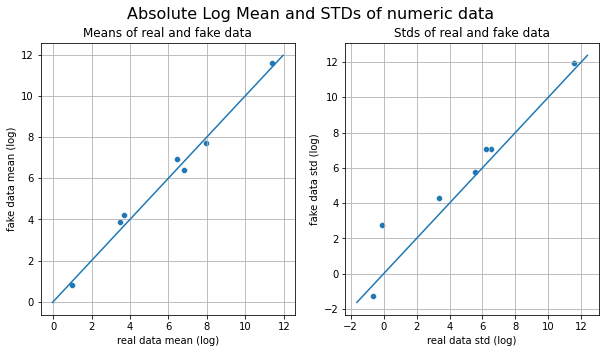

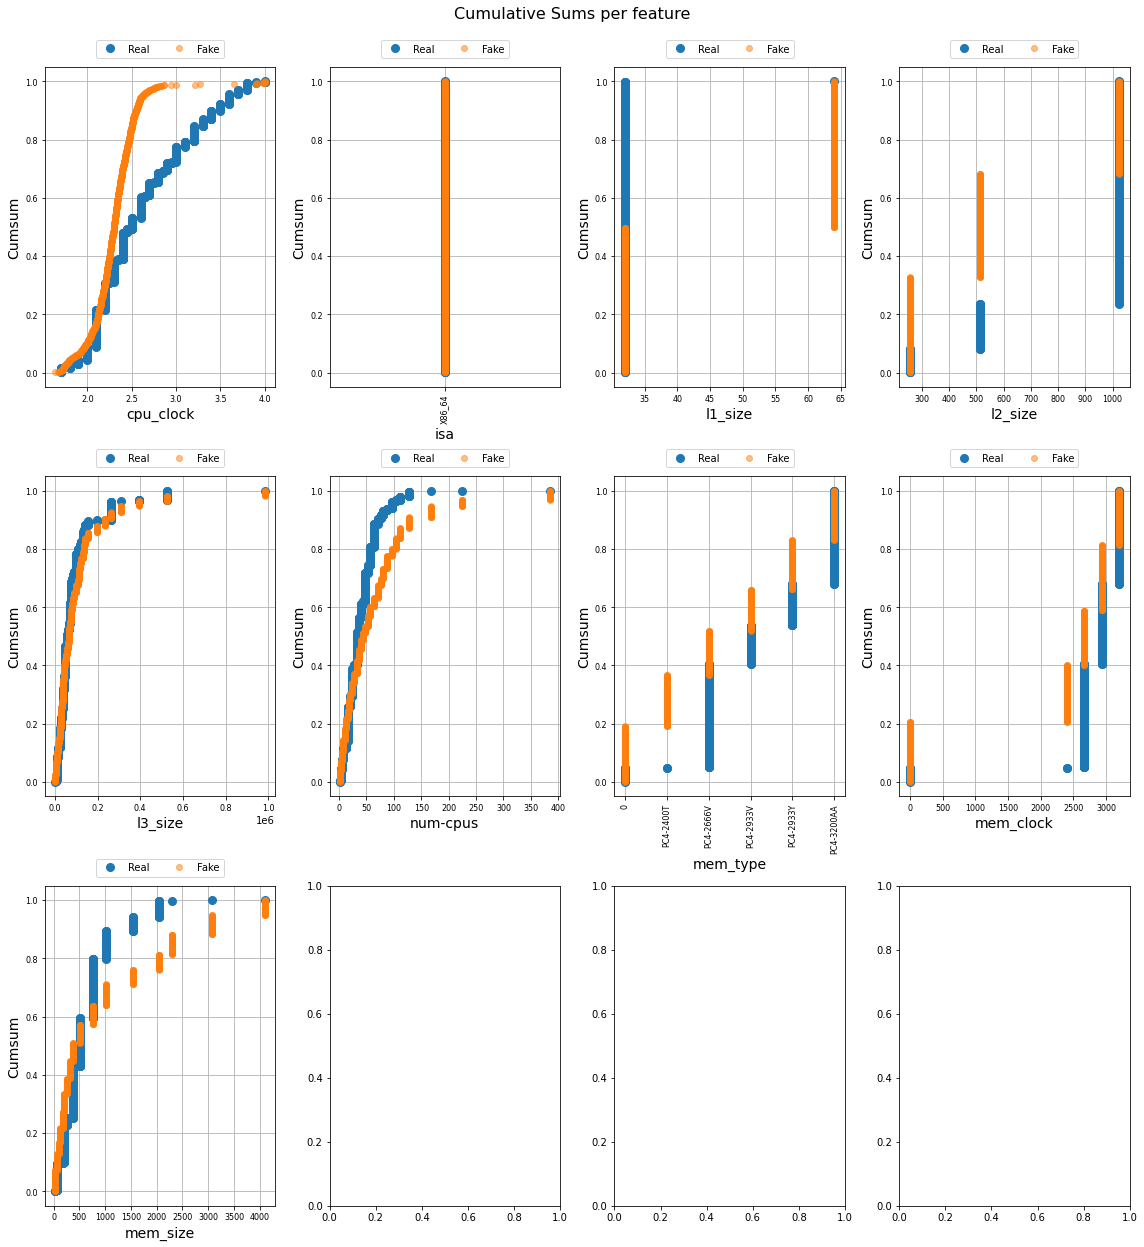

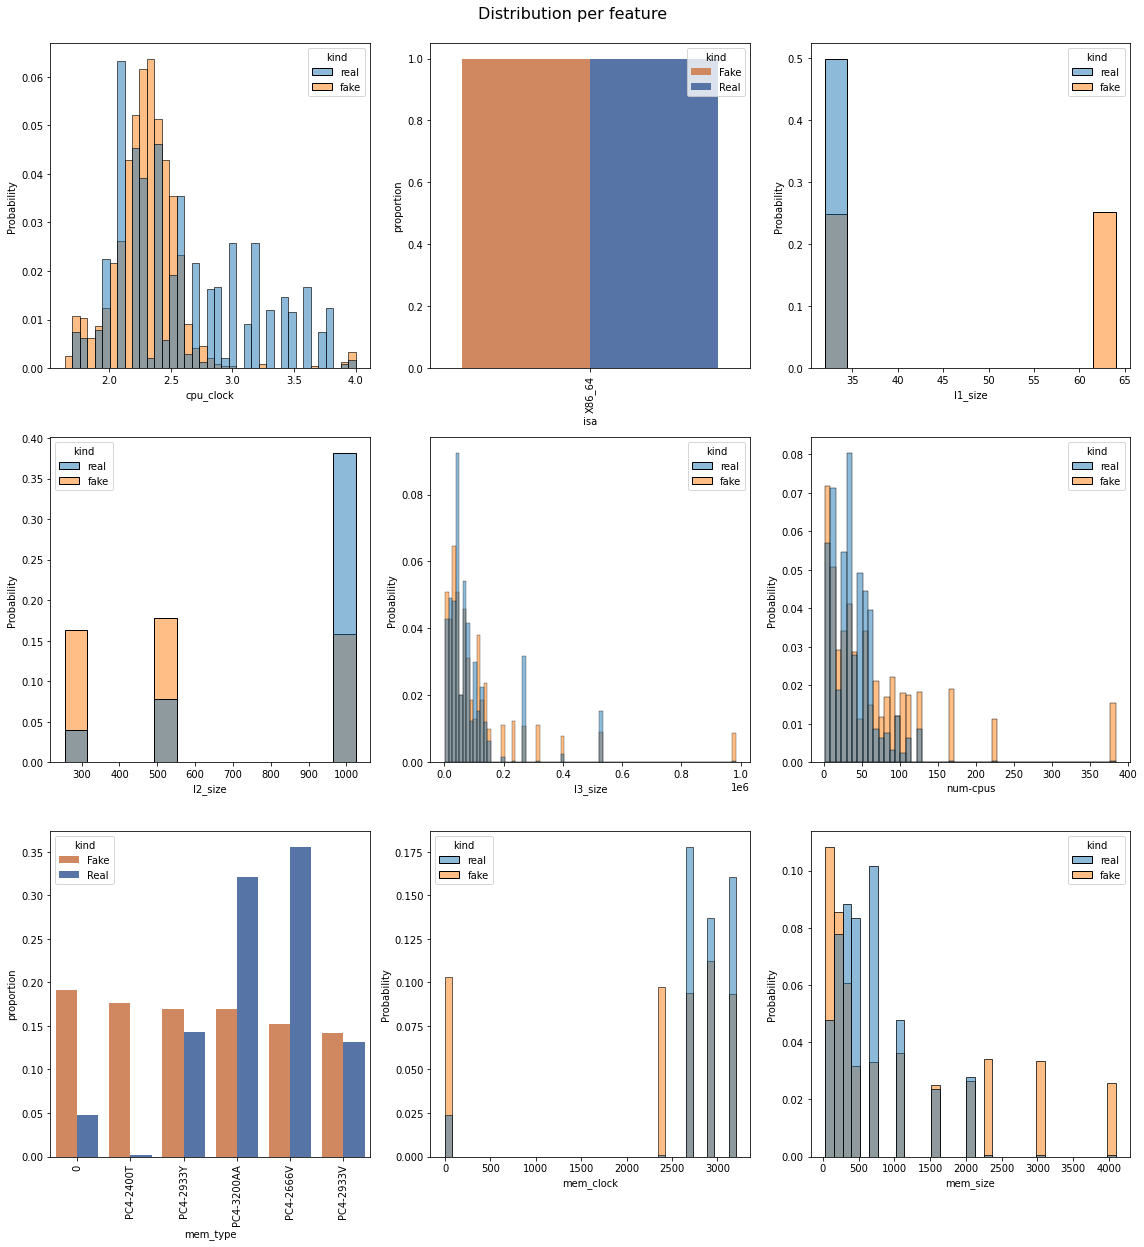

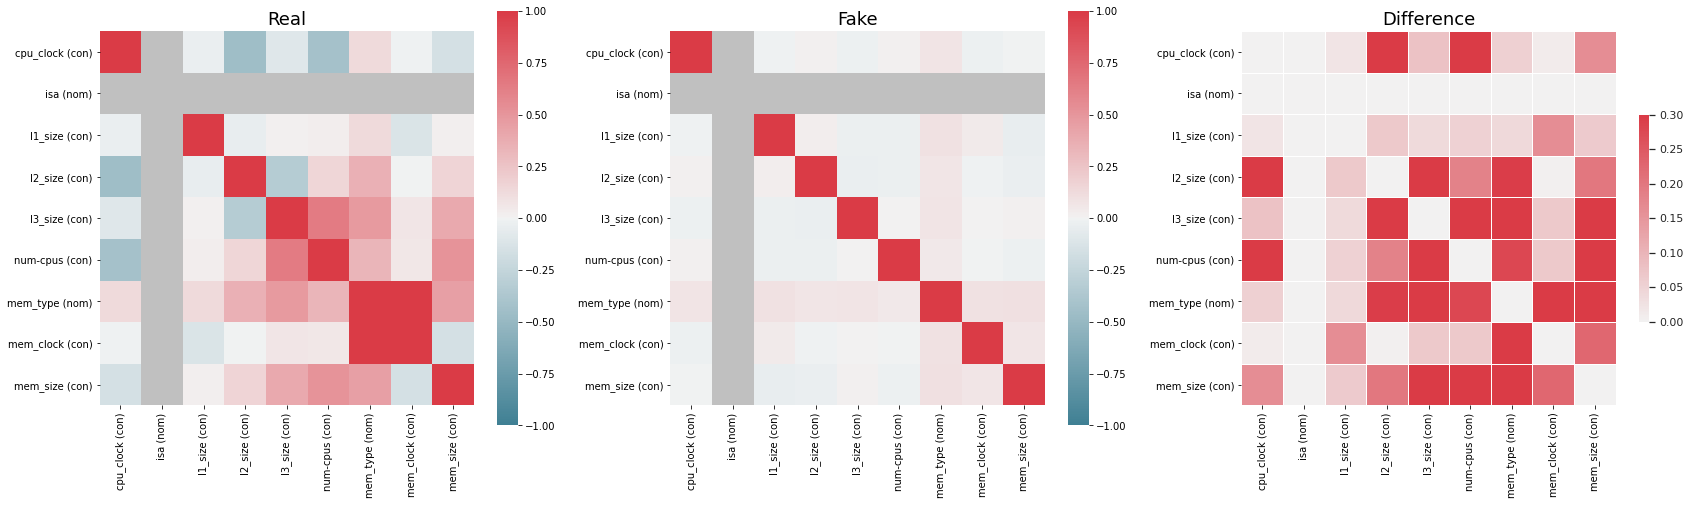

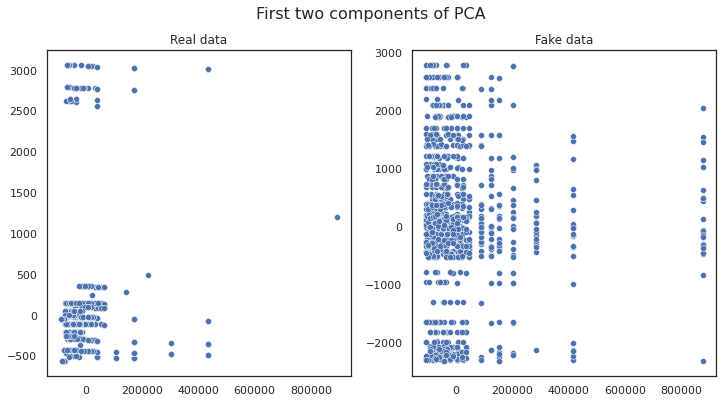

In [ ]:
!pip install table_evaluator
import pandas as pd

from table_evaluator import load_data, TableEvaluator

real_data=pd.read_csv(drive_location+algo+"_real_data.csv")
sample=pd.read_csv(drive_location+algo+"_generated_data_wgan_gp.csv")

table_evaluator =  TableEvaluator(real_data, sample)
table_evaluator.visual_evaluation()